In [229]:
import pandas as pd

g2 = pd.read_excel("g2.xlsx")

# 그룹2 역 주변 버스정류장 개수 넣기

In [197]:
from dbfread import DBF

bus18 = DBF('data/bus/TB_E_BUSSTOP_2018.dbf')
bus18 = pd.DataFrame(bus18)

bus19 = DBF('data/bus/TB_E_BUSSTOP_2019.dbf')
bus19 = pd.DataFrame(bus19)

### 18년도 먼저 넣기

In [198]:
g2_xy = g2[["TM_X", "TM_Y"]]

In [199]:
# TM -> 위경도 변환 함수
import numpy as np

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [200]:
coord = np.array(g2_xy)
coord.shape
#coord[:5]

(94, 2)

In [201]:
import pyproj

# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_18 = project_array(coord, p1_type, p2_type)
result_18[:5]

array([[127.13246522,  37.53585374],
       [127.14413285,  37.49315932],
       [127.07288731,  37.62578211],
       [127.10355767,  37.54535172],
       [126.85489326,  37.4793078 ]])

In [202]:
g2 = g2.drop(['TM_X', 'TM_Y'], axis = 1)
g2["위도"] = result_18[:, 1]
g2["경도"] = result_18[:, 0]

In [203]:
g2.head()

,Unnamed: 0,역명,사용일자,승차총승객수,하차총승객수,노선수,출입구,위도,경도
0,0,강동,7376893938,5575816,5314518,1,5,37.535854,127.132465
1,1,거여,7376893938,2555801,2446703,1,8,37.493159,127.144133
2,2,공릉(서울과학기술대),7376893938,3584553,3575228,1,4,37.625782,127.072887
3,3,광나루(장신대),7376893938,3964334,3659792,1,4,37.545352,127.103558
4,4,광명사거리,7376893938,6871441,6783756,1,10,37.479308,126.854893


In [204]:
g2_xy = np.array(g2[['위도', '경도']])

In [205]:
bus_18_xy = bus18[['TM_X', 'TM_Y']]
bus_18_xy.head()

,TM_X,TM_Y
0,201302.337,551720.408
1,205998.130,560877.090
2,205712.800,559367.328
3,203350.952,557129.688
4,202833.497,556730.145


In [206]:
coord = np.array(bus_18_xy)
coord.shape
#coord[:5]

(10633, 2)

In [207]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_bus18 = project_array(coord, p1_type, p2_type)
result_bus18[:5]

array([[127.01474087,  37.56501789],
       [127.06796654,  37.64750001],
       [127.06472158,  37.63389911],
       [127.03795344,  37.61374991],
       [127.03209111,  37.61015181]])

In [208]:
bus18["위도"] = result_bus18[:, 1]
bus18["경도"] = result_bus18[:, 0]
bus18 = bus18.drop(['TM_X', 'TM_Y'], axis = 1)
bus18 = bus18.reset_index().drop('index', axis=  1)

In [209]:
bus18

,OBJECTID,ID,STN_IDN,TGRP_CODE,STN_NM,US_YY_DD,STTN_ARSNO,위도,경도
0,6129,76,101000078,버스,충무아트센터.스포츠센터.중부소방서,2018-11-23,02178,37.565018,127.014741
1,6130,85,110000277,버스,중계3단지목련아파트,2018-11-23,11378,37.647500,127.067967
2,6131,93,110000351,버스,하계극동아파트,2018-11-23,11452,37.633899,127.064722
3,6132,100,108000100,버스,송중동한일유엔아이,2018-11-23,09188,37.613750,127.037953
4,6133,102,108000102,버스,숭곡초등학교입구,2018-11-23,09190,37.610152,127.032091
...,...,...,...,...,...,...,...,...,...
10628,13987,9378,115900010,버스,등촌6단지,2018-11-23,16518,37.559570,126.847678
10629,14762,9600,120900073,버스,코사마트,2018-11-23,21513,37.476219,126.930202
10630,15037,7173,115000160,버스,가양역.현대프린스텔,2018-11-23,16257,37.560220,126.856350
10631,15578,11374,112900003,버스,뜨란채아파트101동,2018-11-23,13509,37.565837,126.958773


In [210]:
bus18_xy = np.array(bus18[['위도', '경도']])
bus18_xy

array([[ 37.56501789, 127.01474087],
       [ 37.64750001, 127.06796654],
       [ 37.63389911, 127.06472158],
       ...,
       [ 37.5602196 , 126.85634976],
       [ 37.56583701, 126.95877335],
       [ 37.56078089, 126.95603911]])

In [211]:
# 0.5km 반경에 있는 버정 뽑기

from haversine import haversine, Unit

bus18_1km = []
bus18_count = []
bus18_bol = []
print('중, 고등학교\n')
i = 0
for a, b in g2_xy:
    lyon = (a, b)
    count = 0 
    for c, d in bus18_xy:
        paris=(c, d)
        A = haversine(lyon, paris) < 0.5
        if A is True:
            bus18_bol.append([c, d])
        
            count += 1
    print(g2['역명'][i], '->', count, '개')
    print("="*30)
    i += 1
    bus18_count.append(count)
len(bus18_bol)

중, 고등학교

강동 -> 15 개
거여 -> 12 개
공릉(서울과학기술대) -> 36 개
광나루(장신대) -> 18 개
광명사거리 -> 1 개
구산 -> 30 개
구의(광진구청) -> 20 개
구파발 -> 8 개
군자(능동) -> 21 개
굽은다리(강동구민회관앞) -> 8 개
금호 -> 47 개
길동 -> 22 개
길음 -> 34 개
까치산 -> 18 개
낙성대(강감찬) -> 23 개
남성 -> 29 개
남한산성입구(성남법원.검찰청) -> 0 개
녹번 -> 10 개
단대오거리 -> 0 개
답십리 -> 16 개
당고개 -> 7 개
대림(구로구청) -> 23 개
대청 -> 16 개
도봉산 -> 10 개
독바위 -> 16 개
돌곶이 -> 19 개
둔촌동 -> 13 개
뚝섬유원지 -> 7 개
마들 -> 29 개
마천 -> 16 개
먹골 -> 22 개
면목 -> 23 개
명일 -> 21 개
목동 -> 18 개
무악재 -> 11 개
미아(서울사이버대학) -> 23 개
미아사거리 -> 37 개
방화 -> 22 개
보문 -> 28 개
봉천 -> 25 개
봉화산(서울의료원) -> 20 개
불광 -> 23 개
사가정 -> 25 개
산성 -> 0 개
상계 -> 23 개
상도 -> 31 개
상봉(시외버스터미널) -> 16 개
상월곡(한국과학기술연구원) -> 22 개
상일동 -> 20 개
새절(신사) -> 29 개
서울대입구(관악구청) -> 19 개
석계 -> 30 개
수락산 -> 14 개
수유(강북구청) -> 42 개
수진 -> 0 개
숭실대입구(살피재) -> 11 개
신금호 -> 51 개
신답 -> 26 개
신대방삼거리 -> 32 개
신림 -> 28 개
신정(은행정) -> 15 개
신정네거리 -> 20 개
신풍 -> 24 개
신흥 -> 0 개
쌍용(나사렛대) -> 0 개
아차산(어린이대공원후문) -> 25 개
아현 -> 28 개
암사 -> 13 개
양천구청 -> 17 개
역촌 -> 27 개
연신내 -> 31 개
옥수 -> 14 개
온수(성공회대입구) -> 17 개
용답 -> 1

1926

In [212]:
bus18_bol_df = pd.DataFrame(bus18_bol)
bus18_bol_df = bus18_bol_df.rename(columns = {0:'위도', 1:'경도'})
bus18_bol_df = bus18_bol_df.drop_duplicates(['위도', '경도'])
bus18_bol_df = bus18_bol_df.reset_index().drop('index', axis= 1)

In [213]:
bus18_bol_df

,위도,경도
0,37.537133,127.127163
1,37.536124,127.130745
2,37.534446,127.137523
3,37.536151,127.132159
4,37.537343,127.135233
...,...,...
1835,37.618239,127.083289
1836,37.623181,127.081161
1837,37.623272,127.081048
1838,37.622305,127.087177


In [214]:
bus18_bol_500 = bus18.append(bus18_bol_df)
bus18_bol_500

,OBJECTID,ID,STN_IDN,TGRP_CODE,STN_NM,US_YY_DD,STTN_ARSNO,위도,경도
0,6129.0,76.0,101000078,버스,충무아트센터.스포츠센터.중부소방서,2018-11-23,02178,37.565018,127.014741
1,6130.0,85.0,110000277,버스,중계3단지목련아파트,2018-11-23,11378,37.647500,127.067967
2,6131.0,93.0,110000351,버스,하계극동아파트,2018-11-23,11452,37.633899,127.064722
3,6132.0,100.0,108000100,버스,송중동한일유엔아이,2018-11-23,09188,37.613750,127.037953
4,6133.0,102.0,108000102,버스,숭곡초등학교입구,2018-11-23,09190,37.610152,127.032091
...,...,...,...,...,...,...,...,...,...
1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.618239,127.083289
1836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.623181,127.081161
1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.623272,127.081048
1838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.622305,127.087177


In [215]:
bus18_bol_500 = bus18_bol_500[bus18_bol_500.duplicated(['위도', '경도'], keep='last')]

bus18_bol_500 = bus18_bol_500.reset_index().drop('index', axis = 1)
bus18_bol_500

,OBJECTID,ID,STN_IDN,TGRP_CODE,STN_NM,US_YY_DD,STTN_ARSNO,위도,경도
0,6130.0,85.0,110000277,버스,중계3단지목련아파트,2018-11-23,11378,37.647500,127.067967
1,6131.0,93.0,110000351,버스,하계극동아파트,2018-11-23,11452,37.633899,127.064722
2,6133.0,102.0,108000102,버스,숭곡초등학교입구,2018-11-23,09190,37.610152,127.032091
3,6134.0,103.0,107000001,버스,월곡뉴타운,2018-11-23,08001,37.606906,127.028209
4,6135.0,104.0,107000003,버스,길음뉴타운,2018-11-23,08003,37.603626,127.024168
...,...,...,...,...,...,...,...,...,...
1835,15125.0,9728.0,104900002,버스,그랜드마트앞,2018-11-23,05714,37.540319,127.089565
1836,15684.0,12901.0,111900033,버스,미주아트빌,2018-11-23,12595,37.607476,126.914876
1837,16042.0,12976.0,111900157,버스,G캐슬아파트,2018-11-23,12838,37.615206,126.915077
1838,16293.0,11542.0,112900214,버스,인왕산현대아파트입구,2018-11-23,13915,37.585550,126.947886


In [216]:
import pandas as pd
import numpy as np
import pyproj
# 지도 시각화
import folium as g
from folium.plugins import MiniMap
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# dp_map = g.Map(location = [37.55, 126.98],
#                        zoom_start = 12)

# # 앞서 구한 위도와 경도 정보를 가지고 실제 위치에 찍은 결과

# for i in range(len(bus18_bol_500)):
#     marker01 = g.Marker([bus18_bol_500.loc[i]['위도'], bus18_bol_500.loc[i]['경도']],
#                         popup =bus18_bol_500.loc[i]['STN_NM'],
#                         icon = g.Icon(color = 'red'))
#     marker01.add_to(dp_map)

# c = 0
# for item in g2.index:
#     lat = g2.loc[item, '위도']
#     long = g2.loc[item, '경도']
#     g.Marker([lat, long], popup = g2.loc[c]['역명'],
#                         fill = True).add_to(dp_map)
#     g.Circle([lat, long],radius= 500).add_to(dp_map)
#     c += 1
    
# dp_map

In [218]:
bus18_count = pd.DataFrame(bus18_count)

In [219]:
bus18_count

,0
0,15
1,12
2,36
3,18
4,1
...,...
89,36
90,43
91,26
92,21


In [220]:
g2

,Unnamed: 0,역명,사용일자,승차총승객수,하차총승객수,노선수,출입구,위도,경도
0,0,강동,7376893938,5575816,5314518,1,5,37.535854,127.132465
1,1,거여,7376893938,2555801,2446703,1,8,37.493159,127.144133
2,2,공릉(서울과학기술대),7376893938,3584553,3575228,1,4,37.625782,127.072887
3,3,광나루(장신대),7376893938,3964334,3659792,1,4,37.545352,127.103558
4,4,광명사거리,7376893938,6871441,6783756,1,10,37.479308,126.854893
...,...,...,...,...,...,...,...,...,...
89,89,하계,7376893938,5286781,4993580,1,6,37.636391,127.067982
90,90,행당,7376893938,2452183,2190104,1,4,37.557369,127.029472
91,91,홍제,7376893938,5247767,4994451,1,4,37.589110,126.943743
92,92,화곡,7376893938,8512402,7973555,1,8,37.541562,126.840480


In [221]:
g2_18 = pd.concat([g2, bus18_count], axis = 1)

In [222]:
g2_18 = g2_18.drop('Unnamed: 0', axis = 1)
g2_18 = g2_18.rename(columns = {0:'버스정류장'})

### 19년도 넣기

In [230]:
g2_xy = g2[["TM_X", "TM_Y"]]

In [231]:
# TM -> 위경도 변환 함수
import numpy as np

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [232]:
coord = np.array(g2_xy)
coord.shape
#coord[:5]

(94, 2)

In [233]:
import pyproj

# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_19 = project_array(coord, p1_type, p2_type)
result_19[:5]

array([[127.13246522,  37.53585374],
       [127.14413285,  37.49315932],
       [127.07288731,  37.62578211],
       [127.10355767,  37.54535172],
       [126.85489326,  37.4793078 ]])

In [234]:
g2 = g2.drop(['TM_X', 'TM_Y'], axis = 1)
g2["위도"] = result_19[:, 1]
g2["경도"] = result_19[:, 0]

In [235]:
g2.head()

,Unnamed: 0,역명,사용일자,승차총승객수,하차총승객수,노선수,출입구,위도,경도
0,0,강동,7376893938,5575816,5314518,1,5,37.535854,127.132465
1,1,거여,7376893938,2555801,2446703,1,8,37.493159,127.144133
2,2,공릉(서울과학기술대),7376893938,3584553,3575228,1,4,37.625782,127.072887
3,3,광나루(장신대),7376893938,3964334,3659792,1,4,37.545352,127.103558
4,4,광명사거리,7376893938,6871441,6783756,1,10,37.479308,126.854893


In [236]:
g2_xy = np.array(g2[['위도', '경도']])

In [237]:
bus_19_xy = bus19[['TM_X', 'TM_Y']]
bus_19_xy.head()

,TM_X,TM_Y
0,198920.990795,552247.155925
1,199692.618782,553292.015192
2,199848.973782,553683.796125
3,198896.329903,552115.980102
4,200149.651139,554074.605152


In [238]:
coord = np.array(bus_19_xy)
coord.shape
#coord[:5]

(11180, 2)

In [239]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_bus19 = project_array(coord, p1_type, p2_type)
result_bus19[:5]

array([[126.98778615,  37.56976415],
       [126.99652016,  37.57917886],
       [126.99829016,  37.58270882],
       [126.9875072 ,  37.56858223],
       [127.00169435,  37.58622998]])

In [240]:
bus19["위도"] = result_bus19[:, 1]
bus19["경도"] = result_bus19[:, 0]
bus19 = bus19.drop(['TM_X', 'TM_Y'], axis = 1)
bus19 = bus19.reset_index().drop('index', axis=  1)

In [241]:
bus19

,ID,STN_IDN,TGRP_CODE,STN_NM,US_YY_DD,STTN_ARSNO,위도,경도
0,4799,100000001,버스,종로2가사거리,2019-07-30,01001,37.569764,126.987786
1,110,100000002,버스,창경궁.서울대학교병원,2019-07-30,01002,37.579179,126.996520
2,109,100000003,버스,명륜3가.성대입구,2019-07-30,01003,37.582709,126.998290
3,4796,100000004,버스,종로2가.삼일교,2019-07-30,01004,37.568582,126.987507
4,108,100000005,버스,혜화동로터리.여운형활동터,2019-07-30,01005,37.586230,127.001694
...,...,...,...,...,...,...,...,...
11175,14860,124000334,버스,우성아파트,2019-07-30,25995,37.550442,127.139326
11176,14861,124000333,버스,우성아파트,2019-07-30,25996,37.550620,127.140052
11177,14862,124000332,버스,조일약국,2019-07-30,25997,37.533686,127.123477
11178,14863,124000331,버스,성내시장,2019-07-30,25998,37.536199,127.125410


In [242]:
bus19_xy = np.array(bus19[['위도', '경도']])
bus19_xy

array([[ 37.56976415, 126.98778615],
       [ 37.57917886, 126.99652016],
       [ 37.58270882, 126.99829016],
       ...,
       [ 37.53368604, 127.12347693],
       [ 37.5361987 , 127.12540981],
       [ 37.5403901 , 127.12735353]])

In [295]:
# 0.5km 반경에 있는 버정 뽑기

from haversine import haversine, Unit

bus19_1km = []
bus19_count = []
bus19_bol = []
print('버스정류장\n')
i = 0
for a, b in g2_xy:
    lyon = (a, b)
    count = 0 
    for c, d in bus19_xy:
        paris=(c, d)
        A = haversine(lyon, paris) < 0.5
        if A is True:
            bus19_bol.append([c, d])
        
            count += 1
    print(g2['역명'][i], '->', count, '개')
    print("="*30)
    i += 1
    bus19_count.append(count)
len(bus19_bol)

버스정류장

강동 -> 17 개
거여 -> 12 개
공릉(서울과학기술대) -> 34 개
광나루(장신대) -> 19 개
광명사거리 -> 1 개
구산 -> 30 개
구의(광진구청) -> 19 개
구파발 -> 9 개
군자(능동) -> 23 개
굽은다리(강동구민회관앞) -> 10 개
금호 -> 52 개
길동 -> 25 개
길음 -> 33 개
까치산 -> 18 개
낙성대(강감찬) -> 24 개
남성 -> 29 개
남한산성입구(성남법원.검찰청) -> 0 개
녹번 -> 9 개
단대오거리 -> 0 개
답십리 -> 16 개
당고개 -> 11 개
대림(구로구청) -> 25 개
대청 -> 16 개
도봉산 -> 11 개
독바위 -> 16 개
돌곶이 -> 19 개
둔촌동 -> 15 개
뚝섬유원지 -> 8 개
마들 -> 32 개
마천 -> 17 개
먹골 -> 22 개
면목 -> 23 개
명일 -> 27 개
목동 -> 21 개
무악재 -> 11 개
미아(서울사이버대학) -> 23 개
미아사거리 -> 35 개
방화 -> 20 개
보문 -> 27 개
봉천 -> 26 개
봉화산(서울의료원) -> 20 개
불광 -> 27 개
사가정 -> 25 개
산성 -> 0 개
상계 -> 23 개
상도 -> 30 개
상봉(시외버스터미널) -> 15 개
상월곡(한국과학기술연구원) -> 22 개
상일동 -> 20 개
새절(신사) -> 33 개
서울대입구(관악구청) -> 25 개
석계 -> 31 개
수락산 -> 16 개
수유(강북구청) -> 42 개
수진 -> 0 개
숭실대입구(살피재) -> 12 개
신금호 -> 50 개
신답 -> 25 개
신대방삼거리 -> 30 개
신림 -> 31 개
신정(은행정) -> 15 개
신정네거리 -> 20 개
신풍 -> 24 개
신흥 -> 0 개
쌍용(나사렛대) -> 0 개
아차산(어린이대공원후문) -> 25 개
아현 -> 30 개
암사 -> 13 개
양천구청 -> 19 개
역촌 -> 30 개
연신내 -> 32 개
옥수 -> 17 개
온수(성공회대입구) -> 20 개
용답 -> 10

1986

In [244]:
bus19_bol_df = pd.DataFrame(bus19_bol)
bus19_bol_df = bus19_bol_df.rename(columns = {0:'위도', 1:'경도'})
bus19_bol_df = bus19_bol_df.drop_duplicates(['위도', '경도'])
bus19_bol_df = bus19_bol_df.reset_index().drop('index', axis= 1)

In [245]:
bus19_bol_df

,위도,경도
0,37.534572,127.136683
1,37.534586,127.135959
2,37.535884,127.132589
3,37.535907,127.131785
4,37.534345,127.137478
...,...,...
1893,37.621958,127.088299
1894,37.622022,127.088050
1895,37.622275,127.087009
1896,37.623223,127.081113


In [246]:
bus19_bol_500 = bus19.append(bus19_bol_df)
bus19_bol_500

,ID,STN_IDN,TGRP_CODE,STN_NM,US_YY_DD,STTN_ARSNO,위도,경도
0,4799.0,100000001,버스,종로2가사거리,2019-07-30,01001,37.569764,126.987786
1,110.0,100000002,버스,창경궁.서울대학교병원,2019-07-30,01002,37.579179,126.996520
2,109.0,100000003,버스,명륜3가.성대입구,2019-07-30,01003,37.582709,126.998290
3,4796.0,100000004,버스,종로2가.삼일교,2019-07-30,01004,37.568582,126.987507
4,108.0,100000005,버스,혜화동로터리.여운형활동터,2019-07-30,01005,37.586230,127.001694
...,...,...,...,...,...,...,...,...
1893,NaN,NaN,NaN,NaN,NaN,NaN,37.621958,127.088299
1894,NaN,NaN,NaN,NaN,NaN,NaN,37.622022,127.088050
1895,NaN,NaN,NaN,NaN,NaN,NaN,37.622275,127.087009
1896,NaN,NaN,NaN,NaN,NaN,NaN,37.623223,127.081113


In [247]:
bus19_bol_500 = bus19_bol_500[bus19_bol_500.duplicated(['위도', '경도'], keep='last')]

bus19_bol_500 = bus19_bol_500.reset_index().drop('index', axis = 1)
bus19_bol_500

,ID,STN_IDN,TGRP_CODE,STN_NM,US_YY_DD,STTN_ARSNO,위도,경도
0,2007.0,100000142,버스,창신3동주민센터,2019-07-30,01238,37.578774,127.015188
1,297.0,100000143,버스,숭인1동주민센터,2019-07-30,01239,37.578752,127.015240
2,13045.0,100900013,버스,창신쌍용2단지.한성대후문,2019-07-30,01524,37.581314,127.012764
3,13046.0,100900070,버스,명신초.삼선푸르지오.힐스테이트,2019-07-30,01535,37.582147,127.014530
4,13047.0,100900060,버스,종로센트레빌후문.e편한세상보문아파트,2019-07-30,01546,37.581816,127.016180
...,...,...,...,...,...,...,...,...
1919,8954.0,124900110,버스,고덕2단지,2019-07-30,25988,37.560282,127.162906
1920,8955.0,124900109,버스,고덕초등학교,2019-07-30,25989,37.560067,127.165440
1921,8941.0,124900108,버스,암사삼성.현대아파트,2019-07-30,25990,37.553307,127.128600
1922,14860.0,124000334,버스,우성아파트,2019-07-30,25995,37.550442,127.139326


In [248]:
import pandas as pd
import numpy as np
import pyproj
# 지도 시각화
import folium as g
from folium.plugins import MiniMap
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# dp_map = g.Map(location = [37.55, 126.98],
#                        zoom_start = 12)

# # 앞서 구한 위도와 경도 정보를 가지고 실제 위치에 찍은 결과

# for i in range(len(bus18_bol_500)):
#     marker01 = g.Marker([bus18_bol_500.loc[i]['위도'], bus18_bol_500.loc[i]['경도']],
#                         popup =bus18_bol_500.loc[i]['STN_NM'],
#                         icon = g.Icon(color = 'red'))
#     marker01.add_to(dp_map)

# c = 0
# for item in g2.index:
#     lat = g2.loc[item, '위도']
#     long = g2.loc[item, '경도']
#     g.Marker([lat, long], popup = g2.loc[c]['역명'],
#                         fill = True).add_to(dp_map)
#     g.Circle([lat, long],radius= 500).add_to(dp_map)
#     c += 1
    
# dp_map

In [249]:
bus19_count = pd.DataFrame(bus19_count)

In [250]:
bus19_count

,0
0,17
1,12
2,34
3,19
4,1
...,...
89,36
90,48
91,26
92,20


In [251]:
g2

,Unnamed: 0,역명,사용일자,승차총승객수,하차총승객수,노선수,출입구,위도,경도
0,0,강동,7376893938,5575816,5314518,1,5,37.535854,127.132465
1,1,거여,7376893938,2555801,2446703,1,8,37.493159,127.144133
2,2,공릉(서울과학기술대),7376893938,3584553,3575228,1,4,37.625782,127.072887
3,3,광나루(장신대),7376893938,3964334,3659792,1,4,37.545352,127.103558
4,4,광명사거리,7376893938,6871441,6783756,1,10,37.479308,126.854893
...,...,...,...,...,...,...,...,...,...
89,89,하계,7376893938,5286781,4993580,1,6,37.636391,127.067982
90,90,행당,7376893938,2452183,2190104,1,4,37.557369,127.029472
91,91,홍제,7376893938,5247767,4994451,1,4,37.589110,126.943743
92,92,화곡,7376893938,8512402,7973555,1,8,37.541562,126.840480


In [252]:
g2_19 = pd.concat([g2, bus19_count], axis = 1)

In [253]:
g2_19 = g2_19.rename(columns = {0:'버스정류장'})

# 집객시설(백화점, 영화관)

## 18년

In [267]:
집객_18 = DBF('data/집객시설/TL_TBVIATR_FCLTY_INFO_2018.dbf')

In [268]:
집객_18 = pd.DataFrame(집객_18)

In [269]:
department_store18 = 집객_18.set_index('DCLASDC')
department_store18 = department_store18.loc["백화점"].reset_index()
department_store18["DCLASDC"].head()

0    백화점
1    백화점
2    백화점
3    백화점
4    백화점
Name: DCLASDC, dtype: object

In [270]:
department_store18.head()

,DCLASDC,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,백화점,,070301,0100,AA0000017948,산업,서비스산업,종합상품판매업,미분류,DC백화점,,,,207206.008484,548430.178223,,,,,
1,백화점,,070301,0100,AA0000017949,산업,서비스산업,종합상품판매업,미분류,JBC백화점,,,,192780.033325,551863.401001,,,,,
2,백화점,,070301,0100,AA0000017950,산업,서비스산업,종합상품판매업,미분류,KCC건축자재백화점,,,,201760.463013,545003.944275,,,,,
3,백화점,,070301,0100,AA0000017951,산업,서비스산업,종합상품판매업,미분류,가구백화점,,,,185574.151611,548030.777222,,,,,
4,백화점,,070301,0100,AA0000017952,산업,서비스산업,종합상품판매업,미분류,강남학생백화점,,,,193131.390076,544837.493225,,,,,


In [271]:
department_store18_xy = department_store18[['X_VALUE', 'Y_VALUE']]
department_store18_xy.head()

,X_VALUE,Y_VALUE
0,207206.008484,548430.178223
1,192780.033325,551863.401001
2,201760.463013,545003.944275
3,185574.151611,548030.777222
4,193131.390076,544837.493225


In [272]:
coord = np.array(department_store18_xy)
coord.shape
#coord[:5]

(65, 2)

In [273]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_department18 = project_array(coord, p1_type, p2_type)
result_department18[:5]

array([[127.08153092,  37.53534574],
       [126.91827739,  37.56627888],
       [127.0199102 ,  37.50450174],
       [126.83678974,  37.5316625 ],
       [126.92232007,  37.50297814]])

In [274]:
department_store18["위도"] = result_department18[:, 1]
department_store18["경도"] = result_department18[:, 0]
department_store18 = department_store18.drop(['X_VALUE', 'Y_VALUE'], axis = 1)
department_store18 = department_store18.reset_index().drop('index', axis=  1)

In [275]:
department_store18.head()

,DCLASDC,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT,위도,경도
0,백화점,,070301,0100,AA0000017948,산업,서비스산업,종합상품판매업,미분류,DC백화점,,,,,,,,,37.535346,127.081531
1,백화점,,070301,0100,AA0000017949,산업,서비스산업,종합상품판매업,미분류,JBC백화점,,,,,,,,,37.566279,126.918277
2,백화점,,070301,0100,AA0000017950,산업,서비스산업,종합상품판매업,미분류,KCC건축자재백화점,,,,,,,,,37.504502,127.019910
3,백화점,,070301,0100,AA0000017951,산업,서비스산업,종합상품판매업,미분류,가구백화점,,,,,,,,,37.531663,126.836790
4,백화점,,070301,0100,AA0000017952,산업,서비스산업,종합상품판매업,미분류,강남학생백화점,,,,,,,,,37.502978,126.922320


In [276]:
department_store18_xy = np.array(department_store18[['위도', '경도']])
department_store18_xy[:5]

array([[ 37.53534574, 127.08153092],
       [ 37.56627888, 126.91827739],
       [ 37.50450174, 127.0199102 ],
       [ 37.5316625 , 126.83678974],
       [ 37.50297814, 126.92232007]])

In [277]:
# 0.5km 반경에 있는 버정 뽑기

from haversine import haversine, Unit

department_store18_1km = []
department_store18_count = []
department_store18_bol = []
print('백화점\n')
i = 0
for a, b in g2_xy:
    lyon = (a, b)
    count = 0 
    for c, d in department_store18_xy:
        paris=(c, d)
        A = haversine(lyon, paris) < 0.5
        if A is True:
            department_store18_bol.append([c, d])
        
            count += 1
    print(g2['역명'][i], '->', count, '개')
    print("="*30)
    i += 1
    department_store18_count.append(count)
len(department_store18_bol)

백화점

강동 -> 0 개
거여 -> 0 개
공릉(서울과학기술대) -> 0 개
광나루(장신대) -> 0 개
광명사거리 -> 0 개
구산 -> 0 개
구의(광진구청) -> 1 개
구파발 -> 0 개
군자(능동) -> 0 개
굽은다리(강동구민회관앞) -> 0 개
금호 -> 0 개
길동 -> 0 개
길음 -> 0 개
까치산 -> 0 개
낙성대(강감찬) -> 0 개
남성 -> 0 개
남한산성입구(성남법원.검찰청) -> 0 개
녹번 -> 0 개
단대오거리 -> 0 개
답십리 -> 0 개
당고개 -> 1 개
대림(구로구청) -> 0 개
대청 -> 0 개
도봉산 -> 0 개
독바위 -> 0 개
돌곶이 -> 0 개
둔촌동 -> 0 개
뚝섬유원지 -> 0 개
마들 -> 0 개
마천 -> 0 개
먹골 -> 0 개
면목 -> 0 개
명일 -> 0 개
목동 -> 1 개
무악재 -> 0 개
미아(서울사이버대학) -> 0 개
미아사거리 -> 3 개
방화 -> 0 개
보문 -> 0 개
봉천 -> 0 개
봉화산(서울의료원) -> 0 개
불광 -> 0 개
사가정 -> 0 개
산성 -> 0 개
상계 -> 0 개
상도 -> 0 개
상봉(시외버스터미널) -> 0 개
상월곡(한국과학기술연구원) -> 0 개
상일동 -> 0 개
새절(신사) -> 0 개
서울대입구(관악구청) -> 0 개
석계 -> 0 개
수락산 -> 0 개
수유(강북구청) -> 0 개
수진 -> 0 개
숭실대입구(살피재) -> 0 개
신금호 -> 0 개
신답 -> 0 개
신대방삼거리 -> 0 개
신림 -> 0 개
신정(은행정) -> 1 개
신정네거리 -> 0 개
신풍 -> 0 개
신흥 -> 0 개
쌍용(나사렛대) -> 0 개
아차산(어린이대공원후문) -> 1 개
아현 -> 0 개
암사 -> 1 개
양천구청 -> 1 개
역촌 -> 0 개
연신내 -> 0 개
옥수 -> 0 개
온수(성공회대입구) -> 0 개
용답 -> 0 개
용마산(용마폭포공원) -> 0 개
우장산 -> 0 개
월곡(동덕여대) -> 0 개
응암 -> 0 개
잠원 -> 0

11

In [278]:
집객_18 = DBF('data/집객시설/TL_TBVIATR_FCLTY_INFO_2018.dbf')
집객_18 = pd.DataFrame(집객_18)

In [279]:
Movie = 집객_18[집객_18['BCLASDC'].str.contains('영화관', na=False)].reset_index(drop=True)
Movie
Movie_CGV = 집객_18[집객_18['BCLASDC'].str.contains('CGV', na=False)].reset_index(drop=True)
Movie_CGV
Movie_메가박스 = 집객_18[집객_18['BCLASDC'].str.contains('메가박스', na=False)].reset_index(drop=True)
Movie_메가박스
Movie_롯데시네마 = 집객_18[집객_18['BCLASDC'].str.contains('롯데시네마', na=False)].reset_index(drop=True)
Movie_롯데시네마
Movie = Movie_CGV.append(Movie_메가박스).append(Movie_롯데시네마)

In [280]:
Movie = Movie.reset_index().drop('index',axis = 1)

In [281]:
Movie.head()

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,,060204,0101,AA0000017680,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV,,,,202600.703430,547206.217896,,,,,
1,,060204,0101,AA0000017681,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV,,,,208459.140381,548473.999695,,,,,
2,,060204,0101,AA0000017682,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV,,,,194725.554871,550784.790405,,,,,
3,,060204,0101,AA0000017683,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV,,,,198707.903015,551304.484619,,,,,
4,,060204,0101,AA0000017684,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV군자,,,,206923.270630,550700.166382,,,,,


In [282]:
Movie_xy = Movie[['X_VALUE', 'Y_VALUE']]
Movie_xy.head()

,X_VALUE,Y_VALUE
0,202600.703430,547206.217896
1,208459.140381,548473.999695
2,194725.554871,550784.790405
3,198707.903015,551304.484619
4,206923.270630,550700.166382


In [283]:
coord = np.array(Movie_xy)
coord.shape
#coord[:5]

(21, 2)

In [284]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_Movie = project_array(coord, p1_type, p2_type)
result_Movie[:5]

array([[127.02942081,  37.52434232],
       [127.09570971,  37.53572994],
       [126.94030644,  37.55657383],
       [126.98537577,  37.56127045],
       [127.07835334,  37.55580046]])

In [285]:
Movie["위도"] = result_Movie[:, 1]
Movie["경도"] = result_Movie[:, 0]
Movie = Movie.drop(['X_VALUE', 'Y_VALUE'], axis = 1)
Movie = Movie.reset_index().drop('index', axis=  1)

In [286]:
Movie.head()

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT,위도,경도
0,,060204,0101,AA0000017680,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV,,,,,,,,,37.524342,127.029421
1,,060204,0101,AA0000017681,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV,,,,,,,,,37.535730,127.095710
2,,060204,0101,AA0000017682,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV,,,,,,,,,37.556574,126.940306
3,,060204,0101,AA0000017683,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV,,,,,,,,,37.561270,126.985376
4,,060204,0101,AA0000017684,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV군자,,,,,,,,,37.555800,127.078353


In [287]:
Movie_xy = np.array(Movie[['위도', '경도']])
Movie_xy[:5]

array([[ 37.52434232, 127.02942081],
       [ 37.53572994, 127.09570971],
       [ 37.55657383, 126.94030644],
       [ 37.56127045, 126.98537577],
       [ 37.55580046, 127.07835334]])

In [289]:
# 0.5km 반경에 있는 버정 뽑기

from haversine import haversine, Unit

Movie18_1km = []
Movie18_count = []
Movie18_bol = []
print('영화관\n')
i = 0
for a, b in g2_xy:
    lyon = (a, b)
    count = 0 
    for c, d in Movie_xy:
        paris=(c, d)
        A = haversine(lyon, paris) < 0.5
        if A is True:
            Movie18_bol.append([c, d])
        
            count += 1
    print(g2['역명'][i], '->', count, '개')
    print("="*30)
    i += 1
    Movie18_count.append(count)
len(Movie18_bol)

영화관

강동 -> 0 개
거여 -> 0 개
공릉(서울과학기술대) -> 0 개
광나루(장신대) -> 0 개
광명사거리 -> 0 개
구산 -> 0 개
구의(광진구청) -> 0 개
구파발 -> 0 개
군자(능동) -> 1 개
굽은다리(강동구민회관앞) -> 0 개
금호 -> 0 개
길동 -> 0 개
길음 -> 0 개
까치산 -> 0 개
낙성대(강감찬) -> 0 개
남성 -> 0 개
남한산성입구(성남법원.검찰청) -> 0 개
녹번 -> 0 개
단대오거리 -> 0 개
답십리 -> 0 개
당고개 -> 0 개
대림(구로구청) -> 0 개
대청 -> 0 개
도봉산 -> 0 개
독바위 -> 0 개
돌곶이 -> 0 개
둔촌동 -> 0 개
뚝섬유원지 -> 0 개
마들 -> 0 개
마천 -> 0 개
먹골 -> 0 개
면목 -> 0 개
명일 -> 0 개
목동 -> 0 개
무악재 -> 0 개
미아(서울사이버대학) -> 0 개
미아사거리 -> 0 개
방화 -> 0 개
보문 -> 0 개
봉천 -> 0 개
봉화산(서울의료원) -> 0 개
불광 -> 0 개
사가정 -> 0 개
산성 -> 0 개
상계 -> 0 개
상도 -> 0 개
상봉(시외버스터미널) -> 0 개
상월곡(한국과학기술연구원) -> 0 개
상일동 -> 0 개
새절(신사) -> 0 개
서울대입구(관악구청) -> 0 개
석계 -> 0 개
수락산 -> 0 개
수유(강북구청) -> 0 개
수진 -> 0 개
숭실대입구(살피재) -> 0 개
신금호 -> 0 개
신답 -> 0 개
신대방삼거리 -> 0 개
신림 -> 0 개
신정(은행정) -> 0 개
신정네거리 -> 0 개
신풍 -> 0 개
신흥 -> 0 개
쌍용(나사렛대) -> 0 개
아차산(어린이대공원후문) -> 0 개
아현 -> 0 개
암사 -> 0 개
양천구청 -> 0 개
역촌 -> 0 개
연신내 -> 1 개
옥수 -> 0 개
온수(성공회대입구) -> 0 개
용답 -> 0 개
용마산(용마폭포공원) -> 0 개
우장산 -> 0 개
월곡(동덕여대) -> 0 개
응암 -> 0 개
잠원 -> 0

2

In [290]:
department_store18_count = pd.DataFrame(department_store18_count)
department_store18_count = department_store18_count.rename(columns = {0:'백화점'})
Movie18_count = pd.DataFrame(Movie18_count)
Movie18_count = Movie18_count.rename(columns = {0:'영화관'})

In [291]:
g2_18 = pd.concat([g2_18, department_store18_count], axis = 1)

In [292]:
g2_18 = pd.concat([g2_18, Movie18_count], axis = 1)

In [294]:
g2_18

,역명,사용일자,승차총승객수,하차총승객수,노선수,출입구,위도,경도,버스정류장,백화점,영화관
0,강동,7376893938,5575816,5314518,1,5,37.535854,127.132465,15,0,0
1,거여,7376893938,2555801,2446703,1,8,37.493159,127.144133,12,0,0
2,공릉(서울과학기술대),7376893938,3584553,3575228,1,4,37.625782,127.072887,36,0,0
3,광나루(장신대),7376893938,3964334,3659792,1,4,37.545352,127.103558,18,0,0
4,광명사거리,7376893938,6871441,6783756,1,10,37.479308,126.854893,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
89,하계,7376893938,5286781,4993580,1,6,37.636391,127.067982,36,1,0
90,행당,7376893938,2452183,2190104,1,4,37.557369,127.029472,43,0,0
91,홍제,7376893938,5247767,4994451,1,4,37.589110,126.943743,26,0,0
92,화곡,7376893938,8512402,7973555,1,8,37.541562,126.840480,21,0,0


## 19년

In [296]:
집객_19 = DBF('data/집객시설/TL_TBVIATR_FCLTY_INFO_2019.dbf')

In [297]:
집객_19 = pd.DataFrame(집객_19)

In [298]:
department_store19 = 집객_19.set_index('DCLASDC')
department_store19 = department_store19.loc["백화점"].reset_index()
department_store19["DCLASDC"].head()

0    백화점
1    백화점
2    백화점
3    백화점
4    백화점
Name: DCLASDC, dtype: object

In [299]:
department_store19.head()

,DCLASDC,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,백화점,,70301,0100,AA0000000173100,산업,서비스산업,종합상품판매업,미분류,DC백화점,,,,207206.0084,548430.1781,,,,,
1,백화점,,70301,0100,AA0000000501100,산업,서비스산업,종합상품판매업,미분류,KCC건축자재백화점,,,,201760.4629,545003.9442,,,,,
2,백화점,,70301,0100,AA0000000849100,산업,서비스산업,종합상품판매업,미분류,NC백화점강서점,,,,185910.5831,551169.3505,,,,,
3,백화점,,70301,0100,AA0000000850100,산업,서비스산업,종합상품판매업,미분류,NC백화점불광점,,,,193697.4240,556712.1220,,,,,
4,백화점,,70301,0100,AA0000001278100,산업,서비스산업,종합상품판매업,미분류,강남학생백화점,,,,193131.3900,544837.4931,,,,,


In [300]:
department_store19_xy = department_store19[['X_VALUE', 'Y_VALUE']]
department_store19_xy.head()

,X_VALUE,Y_VALUE
0,207206.0084,548430.1781
1,201760.4629,545003.9442
2,185910.5831,551169.3505
3,193697.4240,556712.1220
4,193131.3900,544837.4931


In [301]:
coord = np.array(department_store19_xy)
coord.shape
#coord[:5]

(51, 2)

In [302]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_department19 = project_array(coord, p1_type, p2_type)
result_department19[:5]

array([[127.08153092,  37.53534574],
       [127.0199102 ,  37.50450174],
       [126.8405358 ,  37.55994611],
       [126.9286196 ,  37.6099722 ],
       [126.92232007,  37.50297814]])

In [303]:
department_store19["위도"] = result_department19[:, 1]
department_store19["경도"] = result_department19[:, 0]
department_store19 = department_store19.drop(['X_VALUE', 'Y_VALUE'], axis = 1)
department_store19 = department_store19.reset_index().drop('index', axis=  1)

In [304]:
department_store19.head()

,DCLASDC,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT,위도,경도
0,백화점,,70301,0100,AA0000000173100,산업,서비스산업,종합상품판매업,미분류,DC백화점,,,,,,,,,37.535346,127.081531
1,백화점,,70301,0100,AA0000000501100,산업,서비스산업,종합상품판매업,미분류,KCC건축자재백화점,,,,,,,,,37.504502,127.019910
2,백화점,,70301,0100,AA0000000849100,산업,서비스산업,종합상품판매업,미분류,NC백화점강서점,,,,,,,,,37.559946,126.840536
3,백화점,,70301,0100,AA0000000850100,산업,서비스산업,종합상품판매업,미분류,NC백화점불광점,,,,,,,,,37.609972,126.928620
4,백화점,,70301,0100,AA0000001278100,산업,서비스산업,종합상품판매업,미분류,강남학생백화점,,,,,,,,,37.502978,126.922320


In [305]:
department_store19_xy = np.array(department_store19[['위도', '경도']])
department_store19_xy[:5]

array([[ 37.53534574, 127.08153092],
       [ 37.50450174, 127.0199102 ],
       [ 37.55994611, 126.8405358 ],
       [ 37.6099722 , 126.9286196 ],
       [ 37.50297814, 126.92232007]])

In [306]:
# 0.5km 반경에 있는 버정 뽑기

from haversine import haversine, Unit

department_store19_1km = []
department_store19_count = []
department_store19_bol = []
print('백화점\n')
i = 0
for a, b in g2_xy:
    lyon = (a, b)
    count = 0 
    for c, d in department_store19_xy:
        paris=(c, d)
        A = haversine(lyon, paris) < 0.5
        if A is True:
            department_store19_bol.append([c, d])
        
            count += 1
    print(g2['역명'][i], '->', count, '개')
    print("="*30)
    i += 1
    department_store19_count.append(count)
len(department_store19_bol)

백화점

강동 -> 0 개
거여 -> 0 개
공릉(서울과학기술대) -> 0 개
광나루(장신대) -> 0 개
광명사거리 -> 0 개
구산 -> 0 개
구의(광진구청) -> 1 개
구파발 -> 0 개
군자(능동) -> 0 개
굽은다리(강동구민회관앞) -> 0 개
금호 -> 0 개
길동 -> 0 개
길음 -> 0 개
까치산 -> 0 개
낙성대(강감찬) -> 0 개
남성 -> 0 개
남한산성입구(성남법원.검찰청) -> 0 개
녹번 -> 0 개
단대오거리 -> 0 개
답십리 -> 0 개
당고개 -> 1 개
대림(구로구청) -> 0 개
대청 -> 0 개
도봉산 -> 0 개
독바위 -> 0 개
돌곶이 -> 0 개
둔촌동 -> 0 개
뚝섬유원지 -> 0 개
마들 -> 0 개
마천 -> 0 개
먹골 -> 0 개
면목 -> 0 개
명일 -> 0 개
목동 -> 0 개
무악재 -> 0 개
미아(서울사이버대학) -> 0 개
미아사거리 -> 3 개
방화 -> 0 개
보문 -> 0 개
봉천 -> 0 개
봉화산(서울의료원) -> 0 개
불광 -> 1 개
사가정 -> 0 개
산성 -> 0 개
상계 -> 0 개
상도 -> 0 개
상봉(시외버스터미널) -> 0 개
상월곡(한국과학기술연구원) -> 0 개
상일동 -> 0 개
새절(신사) -> 0 개
서울대입구(관악구청) -> 0 개
석계 -> 0 개
수락산 -> 0 개
수유(강북구청) -> 0 개
수진 -> 0 개
숭실대입구(살피재) -> 0 개
신금호 -> 0 개
신답 -> 0 개
신대방삼거리 -> 0 개
신림 -> 0 개
신정(은행정) -> 0 개
신정네거리 -> 0 개
신풍 -> 0 개
신흥 -> 0 개
쌍용(나사렛대) -> 0 개
아차산(어린이대공원후문) -> 1 개
아현 -> 0 개
암사 -> 0 개
양천구청 -> 0 개
역촌 -> 0 개
연신내 -> 0 개
옥수 -> 0 개
온수(성공회대입구) -> 0 개
용답 -> 0 개
용마산(용마폭포공원) -> 0 개
우장산 -> 0 개
월곡(동덕여대) -> 0 개
응암 -> 0 개
잠원 -> 0

8

In [307]:
집객_19 = DBF('data/집객시설/TL_TBVIATR_FCLTY_INFO_2019.dbf')
집객_19 = pd.DataFrame(집객_19)

In [308]:
Movie = 집객_19[집객_19['BCLASDC'].str.contains('영화관', na=False)].reset_index(drop=True)
Movie
Movie_CGV = 집객_19[집객_19['BCLASDC'].str.contains('CGV', na=False)].reset_index(drop=True)
Movie_CGV
Movie_메가박스 = 집객_19[집객_19['BCLASDC'].str.contains('메가박스', na=False)].reset_index(drop=True)
Movie_메가박스
Movie_롯데시네마 = 집객_19[집객_19['BCLASDC'].str.contains('롯데시네마', na=False)].reset_index(drop=True)
Movie_롯데시네마
Movie = Movie_CGV.append(Movie_메가박스).append(Movie_롯데시네마)

In [309]:
Movie = Movie.reset_index().drop('index',axis = 1)

In [310]:
Movie.head()

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,,60204,0101,AA0000000145101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV,,,,202600.7033,547206.2178,,,,,
1,,60204,0101,AA0000000146101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV,,,,193164.3250,550776.2660,,,,,
2,,60204,0101,AA0000000147101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV,,,,194725.5548,550784.7903,,,,,
3,,60204,0101,AA0000000148101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV(건대점),,,,205912.5834,548922.2587,,,,,
4,,60204,0101,AA0000000149101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV극장,,,,203275.4441,547047.5211,,,,,


In [311]:
Movie_xy = Movie[['X_VALUE', 'Y_VALUE']]
Movie_xy.head()

,X_VALUE,Y_VALUE
0,202600.7033,547206.2178
1,193164.3250,550776.2660
2,194725.5548,550784.7903
3,205912.5834,548922.2587
4,203275.4441,547047.5211


In [312]:
coord = np.array(Movie_xy)
coord.shape
#coord[:5]

(18, 2)

In [313]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_Movie = project_array(coord, p1_type, p2_type)
result_Movie[:5]

array([[127.02942081,  37.52434232],
       [126.9226373 ,  37.55648677],
       [126.94030644,  37.55657383],
       [127.06690069,  37.53978858],
       [127.0370532 ,  37.52291031]])

In [314]:
Movie["위도"] = result_Movie[:, 1]
Movie["경도"] = result_Movie[:, 0]
Movie = Movie.drop(['X_VALUE', 'Y_VALUE'], axis = 1)
Movie = Movie.reset_index().drop('index', axis=  1)

In [315]:
Movie.head()

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT,위도,경도
0,,60204,0101,AA0000000145101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV,,,,,,,,,37.524342,127.029421
1,,60204,0101,AA0000000146101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV,,,,,,,,,37.556487,126.922637
2,,60204,0101,AA0000000147101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV,,,,,,,,,37.556574,126.940306
3,,60204,0101,AA0000000148101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV(건대점),,,,,,,,,37.539789,127.066901
4,,60204,0101,AA0000000149101,레저/관광/예술,문화/예술시설,극장,일반영화관,CGV,CGV극장,,,,,,,,,37.522910,127.037053


In [316]:
Movie_xy = np.array(Movie[['위도', '경도']])
Movie_xy[:5]

array([[ 37.52434232, 127.02942081],
       [ 37.55648677, 126.9226373 ],
       [ 37.55657383, 126.94030644],
       [ 37.53978858, 127.06690069],
       [ 37.52291031, 127.0370532 ]])

In [319]:
# 0.5km 반경에 있는 버정 뽑기

from haversine import haversine, Unit

Movie19_1km = []
Movie19_count = []
Movie19_bol = []
print('영화관\n')
i = 0
for a, b in g2_xy:
    lyon = (a, b)
    count = 0 
    for c, d in Movie_xy:
        paris=(c, d)
        A = haversine(lyon, paris) < 0.5
        if A is True:
            Movie19_bol.append([c, d])
        
            count += 1
    print(g2['역명'][i], '->', count, '개')
    print("="*30)
    i += 1
    Movie19_count.append(count)
len(Movie19_bol)

영화관

강동 -> 0 개
거여 -> 0 개
공릉(서울과학기술대) -> 0 개
광나루(장신대) -> 0 개
광명사거리 -> 0 개
구산 -> 0 개
구의(광진구청) -> 0 개
구파발 -> 0 개
군자(능동) -> 0 개
굽은다리(강동구민회관앞) -> 0 개
금호 -> 0 개
길동 -> 0 개
길음 -> 0 개
까치산 -> 0 개
낙성대(강감찬) -> 0 개
남성 -> 0 개
남한산성입구(성남법원.검찰청) -> 0 개
녹번 -> 0 개
단대오거리 -> 0 개
답십리 -> 0 개
당고개 -> 0 개
대림(구로구청) -> 0 개
대청 -> 0 개
도봉산 -> 0 개
독바위 -> 0 개
돌곶이 -> 0 개
둔촌동 -> 0 개
뚝섬유원지 -> 0 개
마들 -> 0 개
마천 -> 0 개
먹골 -> 0 개
면목 -> 0 개
명일 -> 0 개
목동 -> 0 개
무악재 -> 0 개
미아(서울사이버대학) -> 0 개
미아사거리 -> 0 개
방화 -> 0 개
보문 -> 0 개
봉천 -> 0 개
봉화산(서울의료원) -> 0 개
불광 -> 0 개
사가정 -> 0 개
산성 -> 0 개
상계 -> 0 개
상도 -> 0 개
상봉(시외버스터미널) -> 0 개
상월곡(한국과학기술연구원) -> 0 개
상일동 -> 0 개
새절(신사) -> 0 개
서울대입구(관악구청) -> 0 개
석계 -> 0 개
수락산 -> 0 개
수유(강북구청) -> 0 개
수진 -> 0 개
숭실대입구(살피재) -> 0 개
신금호 -> 0 개
신답 -> 0 개
신대방삼거리 -> 0 개
신림 -> 0 개
신정(은행정) -> 0 개
신정네거리 -> 0 개
신풍 -> 0 개
신흥 -> 0 개
쌍용(나사렛대) -> 0 개
아차산(어린이대공원후문) -> 0 개
아현 -> 0 개
암사 -> 0 개
양천구청 -> 0 개
역촌 -> 0 개
연신내 -> 1 개
옥수 -> 0 개
온수(성공회대입구) -> 0 개
용답 -> 0 개
용마산(용마폭포공원) -> 0 개
우장산 -> 0 개
월곡(동덕여대) -> 0 개
응암 -> 0 개
잠원 -> 0

2

In [321]:
department_store19_count = pd.DataFrame(department_store19_count)
department_store19_count = department_store19_count.rename(columns = {0:'백화점'})
Movie19_count = pd.DataFrame(Movie19_count)
Movie19_count = Movie19_count.rename(columns = {0:'영화관'})

In [322]:
g2_19 = pd.concat([g2_19, department_store19_count], axis = 1)

In [323]:
g2_19 = pd.concat([g2_19, Movie19_count], axis = 1)

In [324]:
g2_19

,Unnamed: 0,역명,사용일자,승차총승객수,하차총승객수,노선수,출입구,위도,경도,버스정류장,백화점,영화관
0,0,강동,7376893938,5575816,5314518,1,5,37.535854,127.132465,17,0,0
1,1,거여,7376893938,2555801,2446703,1,8,37.493159,127.144133,12,0,0
2,2,공릉(서울과학기술대),7376893938,3584553,3575228,1,4,37.625782,127.072887,34,0,0
3,3,광나루(장신대),7376893938,3964334,3659792,1,4,37.545352,127.103558,19,0,0
4,4,광명사거리,7376893938,6871441,6783756,1,10,37.479308,126.854893,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
89,89,하계,7376893938,5286781,4993580,1,6,37.636391,127.067982,36,1,0
90,90,행당,7376893938,2452183,2190104,1,4,37.557369,127.029472,48,0,0
91,91,홍제,7376893938,5247767,4994451,1,4,37.589110,126.943743,26,0,0
92,92,화곡,7376893938,8512402,7973555,1,8,37.541562,126.840480,20,0,1


# 우수중소기업

## 우수중소기업 공간데이터(이거는 그룹3에 넣어야겠다 에바다 탈락)

In [99]:
EXC18 =  DBF("data/집객시설/TL_EXC_SMLPZ_2018.dbf")
EXC18 = pd.DataFrame(EXC18)

In [100]:
# 필요 컬럼 선택

EXC18 = EXC18[['DEC_SE', 'ADDRES', 'TM_X', 'TM_Y']]
EXC18.head()

,DEC_SE,ADDRES,TM_X,TM_Y
0,서울형강소기업,"서울특별시 송파구 백제고분로 503(방이동, 4층)",201091.9942,542392.6480
1,서울형강소기업,"서울특별시 송파구 충민로 10(문정도, 가든파이브툴 8층 8-S17호)",204973.4312,549257.9319
2,서울형강소기업,"서울특별시 성동구 성수이로18길 31(성수동2가,풍림테크원701호)",210437.8909,545280.8105
3,서울형강소기업,"서울특별시 성동구 성수이로18길 31(성수동2가, 풍림테크원빌딩 8층)",210149.1202,546220.1418
4,서울형강소기업,서울특별시 성동구 광나루로6길 9(덕성빌딩 2층),210574.9969,542103.4010


In [101]:
# TM -> 위경도 좌표 변환을 위해 선택

EXC18_xy = EXC18[['TM_X', 'TM_Y']]

In [102]:
# TM -> 위경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [103]:
coord = np.array(EXC18_xy)
coord.shape
#coord[:5]

(615, 2)

In [104]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_EXC18 = project_array(coord, p1_type, p2_type)
result_EXC18[:5]

array([[127.01234619,  37.4809748 ],
       [127.05627649,  37.54281854],
       [127.11805262,  37.506939  ],
       [127.11479959,  37.51540562],
       [127.11955764,  37.47830882]])

In [105]:
EXC18["위도"] = result_EXC18[:, 1]
EXC18["경도"] = result_EXC18[:, 0]

In [106]:
# TM좌표계는 필요없으니 삭제

EXC18 =EXC18.drop(['TM_X', 'TM_Y'], axis =1 )
EXC18

,DEC_SE,ADDRES,위도,경도
0,서울형강소기업,"서울특별시 송파구 백제고분로 503(방이동, 4층)",37.480975,127.012346
1,서울형강소기업,"서울특별시 송파구 충민로 10(문정도, 가든파이브툴 8층 8-S17호)",37.542819,127.056276
2,서울형강소기업,"서울특별시 성동구 성수이로18길 31(성수동2가,풍림테크원701호)",37.506939,127.118053
3,서울형강소기업,"서울특별시 성동구 성수이로18길 31(성수동2가, 풍림테크원빌딩 8층)",37.515406,127.114800
4,서울형강소기업,서울특별시 성동구 광나루로6길 9(덕성빌딩 2층),37.478309,127.119558
...,...,...,...,...
610,일자리창출기업,서울특별시 강서구 강서로 468(동촌동 에이스타워 1201-1호),37.492066,126.989768
611,일자리창출기업,서울특별시 종로구 팔판동 35-1 백월빌딩 3층,37.603346,126.915410
612,일자리창출기업,"종로구 동숭길 122, 동숭아트센터 305호(동숭동)",37.583653,127.003691
613,일자리창출기업,강서구 강서로 468(동촌동 에이스타워 1201-1호),37.567125,126.841465


In [107]:
EXC18_result = np.array(EXC18[['위도', '경도']])
EXC18_result

array([[ 37.4809748 , 127.01234619],
       [ 37.54281854, 127.05627649],
       [ 37.506939  , 127.11805262],
       ...,
       [ 37.583653  , 127.003691  ],
       [ 37.567125  , 126.841465  ],
       [ 37.582923  , 126.98151   ]])

In [109]:
# 0.5km 반경에 있는 버정 뽑기

from haversine import haversine, Unit

EXC_1km = []
EXC_count = []
EXC_bol = []
print('중, 고등학교\n')
i = 0
for a, b in g2_xy:
    lyon = (a, b)
    count = 0 
    for c, d in EXC18_result:
        paris=(c, d)
        A = haversine(lyon, paris) < 0.5
        if A is True:
            EXC_bol.append([c, d])
        
            count += 1
    print(g2['역명'][i], '->', count, '개')
    print("="*30)
    i += 1
    EXC_count.append(count)
len(EXC_bol)

중, 고등학교

강동 -> 0 개
거여 -> 1 개
공릉(서울과학기술대) -> 0 개
광나루(장신대) -> 0 개
광명사거리 -> 0 개
구산 -> 0 개
구의(광진구청) -> 0 개
구파발 -> 0 개
군자(능동) -> 1 개
굽은다리(강동구민회관앞) -> 0 개
금호 -> 0 개
길동 -> 0 개
길음 -> 0 개
까치산 -> 0 개
낙성대(강감찬) -> 0 개
남성 -> 0 개
남한산성입구(성남법원.검찰청) -> 0 개
녹번 -> 0 개
단대오거리 -> 0 개
답십리 -> 1 개
당고개 -> 0 개
대림(구로구청) -> 0 개
대청 -> 0 개
도봉산 -> 1 개
독바위 -> 0 개
돌곶이 -> 1 개
둔촌동 -> 0 개
뚝섬유원지 -> 0 개
마들 -> 0 개
마천 -> 1 개
먹골 -> 0 개
면목 -> 0 개
명일 -> 0 개
목동 -> 0 개
무악재 -> 0 개
미아(서울사이버대학) -> 1 개
미아사거리 -> 0 개
방화 -> 0 개
보문 -> 0 개
봉천 -> 0 개
봉화산(서울의료원) -> 0 개
불광 -> 0 개
사가정 -> 0 개
산성 -> 0 개
상계 -> 0 개
상도 -> 0 개
상봉(시외버스터미널) -> 0 개
상월곡(한국과학기술연구원) -> 2 개
상일동 -> 0 개
새절(신사) -> 0 개
서울대입구(관악구청) -> 1 개
석계 -> 0 개
수락산 -> 0 개
수유(강북구청) -> 0 개
수진 -> 0 개
숭실대입구(살피재) -> 1 개
신금호 -> 0 개
신답 -> 0 개
신대방삼거리 -> 1 개
신림 -> 0 개
신정(은행정) -> 1 개
신정네거리 -> 0 개
신풍 -> 1 개
신흥 -> 0 개
쌍용(나사렛대) -> 0 개
아차산(어린이대공원후문) -> 2 개
아현 -> 0 개
암사 -> 0 개
양천구청 -> 0 개
역촌 -> 0 개
연신내 -> 1 개
옥수 -> 0 개
온수(성공회대입구) -> 0 개
용답 -> 0 개
용마산(용마폭포공원) -> 0 개
우장산 -> 0 개
월곡(동덕여대) -> 0 개
응암 -> 0 개
잠원 

20

# 총 집객시설 개수

In [394]:
집객18 = DBF('data/집객시설/TL_TBVIATR_FCLTY_INFO_2018.dbf')
집객18 = pd.DataFrame(집객18)

In [395]:
# TM -> 위경도 좌표 변환을 위해 선택

집객18_xy = 집객18[['X_VALUE', 'Y_VALUE']]

In [396]:
# TM -> 위경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [397]:
coord = np.array(집객18_xy)
coord.shape
#coord[:5]

(22187, 2)

In [398]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_집객18 = project_array(coord, p1_type, p2_type)
result_집객18[:5]

array([[126.91757788,  37.52631729],
       [127.05281383,  37.48906029],
       [126.90805043,  37.45540373],
       [127.04413642,  37.54792105],
       [127.15194028,  37.54621175]])

In [399]:
집객18["위도"] = result_집객18[:, 1]
집객18["경도"] = result_집객18[:, 0]

In [400]:
# TM좌표계는 필요없으니 삭제

집객18 =집객18.drop(['X_VALUE', 'Y_VALUE'], axis =1 )
집객18

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT,위도,경도
0,,010101,0000,AA0000000001,행정,중앙행정기관,중앙행정부처,미분류,,교육시설공제회관,,,,,,,,,37.526317,126.917578
1,,010101,0000,AA0000000002,행정,중앙행정기관,중앙행정부처,미분류,,군인공제회관,,,,,,,,,37.489060,127.052814
2,,010101,0000,AA0000000003,행정,중앙행정기관,중앙행정부처,미분류,,금천구재향군인회,,,,,,,,,37.455404,126.908050
3,,010101,0000,AA0000000004,행정,중앙행정기관,중앙행정부처,미분류,,대한민국재향군인회,,,,,,,,,37.547921,127.044136
4,,010101,0000,AA0000000005,행정,중앙행정기관,중앙행정부처,미분류,,대한민국특수임무유공자회,,,,,,,,,37.546212,127.151940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22182,,070308,0800,AA0000022183,산업,서비스산업,언론/미디어,기타언론/미디어,,하이씨씨엔터테인먼트사옥,,,,,,,,,37.525384,126.904629
22183,,070308,0800,AA0000022184,산업,서비스산업,언론/미디어,기타언론/미디어,,한국SGI미디어센터,,,,,,,,,37.502894,126.891486
22184,,070308,0800,AA0000022185,산업,서비스산업,언론/미디어,기타언론/미디어,,한국후지필름(주),,,,,,,,,37.484767,126.880169
22185,,070308,0800,AA0000022186,산업,서비스산업,언론/미디어,기타언론/미디어,,한빛미디어,,,,,,,,,37.554280,126.913630


In [401]:
집객18_result = np.array(집객18[['위도', '경도']])
집객18_result

array([[ 37.52631729, 126.91757788],
       [ 37.48906029, 127.05281383],
       [ 37.45540373, 126.90805043],
       ...,
       [ 37.48476725, 126.88016853],
       [ 37.55428031, 126.91363026],
       [ 37.54755943, 126.92191879]])

In [402]:
# 0.5km 반경에 있는 버정 뽑기

from haversine import haversine, Unit

집객_1km = []
집객_count = []
집객_bol = []
print('집객시설\n')
i = 0
for a, b in g2_xy:
    lyon = (a, b)
    count = 0 
    for c, d in 집객18_result:
        paris=(c, d)
        A = haversine(lyon, paris) < 0.5
        if A is True:
            집객_bol.append([c, d])
        
            count += 1
    print(g2['역명'][i], '->', count, '개')
    print("="*30)
    i += 1
    집객_count.append(count)
len(집객_bol)

집객시설

강동 -> 80 개
거여 -> 31 개
공릉(서울과학기술대) -> 38 개
광나루(장신대) -> 25 개
광명사거리 -> 1 개
구산 -> 67 개
구의(광진구청) -> 62 개
구파발 -> 18 개
군자(능동) -> 67 개
굽은다리(강동구민회관앞) -> 73 개
금호 -> 41 개
길동 -> 113 개
길음 -> 66 개
까치산 -> 91 개
낙성대(강감찬) -> 51 개
남성 -> 42 개
남한산성입구(성남법원.검찰청) -> 0 개
녹번 -> 18 개
단대오거리 -> 0 개
답십리 -> 62 개
당고개 -> 35 개
대림(구로구청) -> 62 개
대청 -> 20 개
도봉산 -> 8 개
독바위 -> 24 개
돌곶이 -> 70 개
둔촌동 -> 51 개
뚝섬유원지 -> 16 개
마들 -> 35 개
마천 -> 36 개
먹골 -> 38 개
면목 -> 50 개
명일 -> 57 개
목동 -> 51 개
무악재 -> 25 개
미아(서울사이버대학) -> 61 개
미아사거리 -> 88 개
방화 -> 39 개
보문 -> 41 개
봉천 -> 76 개
봉화산(서울의료원) -> 9 개
불광 -> 74 개
사가정 -> 85 개
산성 -> 0 개
상계 -> 55 개
상도 -> 38 개
상봉(시외버스터미널) -> 87 개
상월곡(한국과학기술연구원) -> 40 개
상일동 -> 13 개
새절(신사) -> 64 개
서울대입구(관악구청) -> 95 개
석계 -> 42 개
수락산 -> 29 개
수유(강북구청) -> 134 개
수진 -> 0 개
숭실대입구(살피재) -> 29 개
신금호 -> 36 개
신답 -> 34 개
신대방삼거리 -> 73 개
신림 -> 167 개
신정(은행정) -> 54 개
신정네거리 -> 66 개
신풍 -> 45 개
신흥 -> 0 개
쌍용(나사렛대) -> 0 개
아차산(어린이대공원후문) -> 53 개
아현 -> 48 개
암사 -> 75 개
양천구청 -> 16 개
역촌 -> 56 개
연신내 -> 157 개
옥수 -> 12 개
온수(성공회대입구) -> 22 개
용답 -

4489

In [412]:
집객_count = pd.DataFrame(집객_count)
집객_count = 집객_count.rename(columns = {0:'총집객시설'})

In [413]:
g2_18 = pd.concat([g2_18, 집객_count], axis = 1)

In [414]:
g2_18

,역명,사용일자,승차총승객수,하차총승객수,노선수,출입구,위도,경도,버스정류장,백화점,영화관,총집객시설
0,강동,7376893938,5575816,5314518,1,5,37.535854,127.132465,15,0,0,80
1,거여,7376893938,2555801,2446703,1,8,37.493159,127.144133,12,0,0,31
2,공릉(서울과학기술대),7376893938,3584553,3575228,1,4,37.625782,127.072887,36,0,0,38
3,광나루(장신대),7376893938,3964334,3659792,1,4,37.545352,127.103558,18,0,0,25
4,광명사거리,7376893938,6871441,6783756,1,10,37.479308,126.854893,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
89,하계,7376893938,5286781,4993580,1,6,37.636391,127.067982,36,1,0,38
90,행당,7376893938,2452183,2190104,1,4,37.557369,127.029472,43,0,0,41
91,홍제,7376893938,5247767,4994451,1,4,37.589110,126.943743,26,0,0,82
92,화곡,7376893938,8512402,7973555,1,8,37.541562,126.840480,21,0,0,71


# 그룹2 교육/보건

In [415]:
집객_18 = DBF('data/집객시설/TL_TBVIATR_FCLTY_INFO_2018.dbf')

In [416]:
집객_18 = pd.DataFrame(집객_18)

In [417]:
department_store18 = 집객_18.set_index('LCLASDC')
department_store18 = department_store18.loc["교육/보건"].reset_index()

In [418]:
department_store18.head()

,LCLASDC,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,교육/보건,,030101,0100,AA0000000684,교육시설,유아교육기관,어린이집,,ABC어린이집,,,,202828.219299,551754.897522,,,,,
1,교육/보건,,030101,0100,AA0000000685,교육시설,유아교육기관,어린이집,,CEC어린이집,,,,185245.935974,549263.122375,,,,,
2,교육/보건,,030101,0100,AA0000000686,교육시설,유아교육기관,어린이집,,EQ어린이집,,,,206037.063171,549490.289429,,,,,
3,교육/보건,,030101,0100,AA0000000687,교육시설,유아교육기관,어린이집,,e편한세상신촌4단지아파트별빛어린이집,,,,196094.398000,551022.954000,,,,,
4,교육/보건,,030101,0100,AA0000000688,교육시설,유아교육기관,어린이집,,e편한세상옥수파크힐스구립옥수힐스어린이집,,,,201013.972000,549658.871000,,,,,


In [419]:
department_store18_xy = department_store18[['X_VALUE', 'Y_VALUE']]
department_store18_xy.head()

,X_VALUE,Y_VALUE
0,202828.219299,551754.897522
1,185245.935974,549263.122375
2,206037.063171,549490.289429
3,196094.398000,551022.954000
4,201013.972000,549658.871000


In [420]:
coord = np.array(department_store18_xy)
coord.shape
#coord[:5]

(14221, 2)

In [421]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_department18 = project_array(coord, p1_type, p2_type)
result_department18[:5]

array([[127.03201213,  37.56532522],
       [126.83305166,  37.5427607 ],
       [127.06831385,  37.54490573],
       [126.95579705,  37.5587265 ],
       [127.01147408,  37.54644385]])

In [422]:
department_store18["위도"] = result_department18[:, 1]
department_store18["경도"] = result_department18[:, 0]
department_store18 = department_store18.drop(['X_VALUE', 'Y_VALUE'], axis = 1)
department_store18 = department_store18.reset_index().drop('index', axis=  1)

In [423]:
department_store18.head()

,LCLASDC,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT,위도,경도
0,교육/보건,,030101,0100,AA0000000684,교육시설,유아교육기관,어린이집,,ABC어린이집,,,,,,,,,37.565325,127.032012
1,교육/보건,,030101,0100,AA0000000685,교육시설,유아교육기관,어린이집,,CEC어린이집,,,,,,,,,37.542761,126.833052
2,교육/보건,,030101,0100,AA0000000686,교육시설,유아교육기관,어린이집,,EQ어린이집,,,,,,,,,37.544906,127.068314
3,교육/보건,,030101,0100,AA0000000687,교육시설,유아교육기관,어린이집,,e편한세상신촌4단지아파트별빛어린이집,,,,,,,,,37.558726,126.955797
4,교육/보건,,030101,0100,AA0000000688,교육시설,유아교육기관,어린이집,,e편한세상옥수파크힐스구립옥수힐스어린이집,,,,,,,,,37.546444,127.011474


In [424]:
department_store18_xy = np.array(department_store18[['위도', '경도']])
department_store18_xy[:5]

array([[ 37.56532522, 127.03201213],
       [ 37.5427607 , 126.83305166],
       [ 37.54490573, 127.06831385],
       [ 37.5587265 , 126.95579705],
       [ 37.54644385, 127.01147408]])

In [459]:
# 0.5km 반경에 있는 버정 뽑기

from haversine import haversine, Unit

department_store18_1km = []
department_store18_count = []
department_store18_bol = []
print('교육/보건\n')
i = 0
for a, b in g2_xy:
    lyon = (a, b)
    count = 0 
    for c, d in department_store18_xy:
        paris=(c, d)
        A = haversine(lyon, paris) < 0.5
        if A is True:
            department_store18_bol.append([c, d])
        
            count += 1
    print(g2['역명'][i], '->', count, '개')
    print("="*30)
    i += 1
    department_store18_count.append(count)
len(department_store18_bol)

교육/보건

강동 -> 22 개
거여 -> 0 개
공릉(서울과학기술대) -> 1 개
광나루(장신대) -> 2 개
광명사거리 -> 0 개
구산 -> 1 개
구의(광진구청) -> 4 개
구파발 -> 0 개
군자(능동) -> 6 개
굽은다리(강동구민회관앞) -> 2 개
금호 -> 4 개
길동 -> 34 개
길음 -> 14 개
까치산 -> 32 개
낙성대(강감찬) -> 0 개
남성 -> 1 개
남한산성입구(성남법원.검찰청) -> 0 개
녹번 -> 2 개
단대오거리 -> 0 개
답십리 -> 9 개
당고개 -> 3 개
대림(구로구청) -> 0 개
대청 -> 0 개
도봉산 -> 1 개
독바위 -> 0 개
돌곶이 -> 8 개
둔촌동 -> 3 개
뚝섬유원지 -> 0 개
마들 -> 0 개
마천 -> 3 개
먹골 -> 0 개
면목 -> 2 개
명일 -> 2 개
목동 -> 0 개
무악재 -> 2 개
미아(서울사이버대학) -> 12 개
미아사거리 -> 24 개
방화 -> 0 개
보문 -> 5 개
봉천 -> 3 개
봉화산(서울의료원) -> 0 개
불광 -> 19 개
사가정 -> 8 개
산성 -> 0 개
상계 -> 5 개
상도 -> 2 개
상봉(시외버스터미널) -> 29 개
상월곡(한국과학기술연구원) -> 0 개
상일동 -> 0 개
새절(신사) -> 6 개
서울대입구(관악구청) -> 30 개
석계 -> 3 개
수락산 -> 1 개
수유(강북구청) -> 57 개
수진 -> 0 개
숭실대입구(살피재) -> 1 개
신금호 -> 1 개
신답 -> 6 개
신대방삼거리 -> 5 개
신림 -> 94 개
신정(은행정) -> 4 개
신정네거리 -> 6 개
신풍 -> 5 개
신흥 -> 0 개
쌍용(나사렛대) -> 0 개
아차산(어린이대공원후문) -> 6 개
아현 -> 6 개
암사 -> 3 개
양천구청 -> 0 개
역촌 -> 7 개
연신내 -> 37 개
옥수 -> 1 개
온수(성공회대입구) -> 0 개
용답 -> 0 개
용마산(용마폭포공원) -> 4 개
우장산 -> 0 개
월곡(동덕여대) -> 3 개
응암 

599

In [426]:
department_store18_count = pd.DataFrame(department_store18_count)
department_store18_count = department_store18_count.rename(columns = {0:'교육/보건'})

In [427]:
g2_18 = pd.concat([g2_18, department_store18_count], axis = 1)

In [428]:
g2_18

,역명,사용일자,승차총승객수,하차총승객수,노선수,출입구,위도,경도,버스정류장,백화점,영화관,총집객시설,교육/보건
0,강동,7376893938,5575816,5314518,1,5,37.535854,127.132465,15,0,0,80,44
1,거여,7376893938,2555801,2446703,1,8,37.493159,127.144133,12,0,0,31,23
2,공릉(서울과학기술대),7376893938,3584553,3575228,1,4,37.625782,127.072887,36,0,0,38,29
3,광나루(장신대),7376893938,3964334,3659792,1,4,37.545352,127.103558,18,0,0,25,13
4,광명사거리,7376893938,6871441,6783756,1,10,37.479308,126.854893,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,하계,7376893938,5286781,4993580,1,6,37.636391,127.067982,36,1,0,38,27
90,행당,7376893938,2452183,2190104,1,4,37.557369,127.029472,43,0,0,41,26
91,홍제,7376893938,5247767,4994451,1,4,37.589110,126.943743,26,0,0,82,54
92,화곡,7376893938,8512402,7973555,1,8,37.541562,126.840480,21,0,0,71,58


# 그룹2 산업

In [429]:
집객_18 = DBF('data/집객시설/TL_TBVIATR_FCLTY_INFO_2018.dbf')

In [430]:
집객_18 = pd.DataFrame(집객_18)

In [431]:
department_store18 = 집객_18.set_index('LCLASDC')
department_store18 = department_store18.loc["산업"].reset_index()

In [432]:
department_store18.head()

,LCLASDC,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,산업,,070301,0100,AA0000017948,서비스산업,종합상품판매업,백화점,미분류,DC백화점,,,,207206.008484,548430.178223,,,,,
1,산업,,070301,0100,AA0000017949,서비스산업,종합상품판매업,백화점,미분류,JBC백화점,,,,192780.033325,551863.401001,,,,,
2,산업,,070301,0100,AA0000017950,서비스산업,종합상품판매업,백화점,미분류,KCC건축자재백화점,,,,201760.463013,545003.944275,,,,,
3,산업,,070301,0100,AA0000017951,서비스산업,종합상품판매업,백화점,미분류,가구백화점,,,,185574.151611,548030.777222,,,,,
4,산업,,070301,0100,AA0000017952,서비스산업,종합상품판매업,백화점,미분류,강남학생백화점,,,,193131.390076,544837.493225,,,,,


In [433]:
department_store18_xy = department_store18[['X_VALUE', 'Y_VALUE']]
department_store18_xy.head()

,X_VALUE,Y_VALUE
0,207206.008484,548430.178223
1,192780.033325,551863.401001
2,201760.463013,545003.944275
3,185574.151611,548030.777222
4,193131.390076,544837.493225


In [434]:
coord = np.array(department_store18_xy)
coord.shape
#coord[:5]

(4240, 2)

In [435]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_department18 = project_array(coord, p1_type, p2_type)
result_department18[:5]

array([[127.08153092,  37.53534574],
       [126.91827739,  37.56627888],
       [127.0199102 ,  37.50450174],
       [126.83678974,  37.5316625 ],
       [126.92232007,  37.50297814]])

In [436]:
department_store18["위도"] = result_department18[:, 1]
department_store18["경도"] = result_department18[:, 0]
department_store18 = department_store18.drop(['X_VALUE', 'Y_VALUE'], axis = 1)
department_store18 = department_store18.reset_index().drop('index', axis=  1)

In [437]:
department_store18.head()

,LCLASDC,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT,위도,경도
0,산업,,070301,0100,AA0000017948,서비스산업,종합상품판매업,백화점,미분류,DC백화점,,,,,,,,,37.535346,127.081531
1,산업,,070301,0100,AA0000017949,서비스산업,종합상품판매업,백화점,미분류,JBC백화점,,,,,,,,,37.566279,126.918277
2,산업,,070301,0100,AA0000017950,서비스산업,종합상품판매업,백화점,미분류,KCC건축자재백화점,,,,,,,,,37.504502,127.019910
3,산업,,070301,0100,AA0000017951,서비스산업,종합상품판매업,백화점,미분류,가구백화점,,,,,,,,,37.531663,126.836790
4,산업,,070301,0100,AA0000017952,서비스산업,종합상품판매업,백화점,미분류,강남학생백화점,,,,,,,,,37.502978,126.922320


In [438]:
department_store18_xy = np.array(department_store18[['위도', '경도']])
department_store18_xy[:5]

array([[ 37.53534574, 127.08153092],
       [ 37.56627888, 126.91827739],
       [ 37.50450174, 127.0199102 ],
       [ 37.5316625 , 126.83678974],
       [ 37.50297814, 126.92232007]])

In [458]:
# 0.5km 반경에 있는 버정 뽑기

from haversine import haversine, Unit

department_store18_1km = []
department_store18_count = []
department_store18_bol = []
print('산업\n')
i = 0
for a, b in g2_xy:
    lyon = (a, b)
    count = 0 
    for c, d in department_store18_xy:
        paris=(c, d)
        A = haversine(lyon, paris) < 0.5
        if A is True:
            department_store18_bol.append([c, d])
        
            count += 1
    print(g2['역명'][i], '->', count, '개')
    print("="*30)
    i += 1
    department_store18_count.append(count)
len(department_store18_bol)

산업

강동 -> 22 개
거여 -> 0 개
공릉(서울과학기술대) -> 1 개
광나루(장신대) -> 2 개
광명사거리 -> 0 개
구산 -> 1 개
구의(광진구청) -> 4 개
구파발 -> 0 개
군자(능동) -> 6 개
굽은다리(강동구민회관앞) -> 2 개
금호 -> 4 개
길동 -> 34 개
길음 -> 14 개
까치산 -> 32 개
낙성대(강감찬) -> 0 개
남성 -> 1 개
남한산성입구(성남법원.검찰청) -> 0 개
녹번 -> 2 개
단대오거리 -> 0 개
답십리 -> 9 개
당고개 -> 3 개
대림(구로구청) -> 0 개
대청 -> 0 개
도봉산 -> 1 개
독바위 -> 0 개
돌곶이 -> 8 개
둔촌동 -> 3 개
뚝섬유원지 -> 0 개
마들 -> 0 개
마천 -> 3 개
먹골 -> 0 개
면목 -> 2 개
명일 -> 2 개
목동 -> 0 개
무악재 -> 2 개
미아(서울사이버대학) -> 12 개
미아사거리 -> 24 개
방화 -> 0 개
보문 -> 5 개
봉천 -> 3 개
봉화산(서울의료원) -> 0 개
불광 -> 19 개
사가정 -> 8 개
산성 -> 0 개
상계 -> 5 개
상도 -> 2 개
상봉(시외버스터미널) -> 29 개
상월곡(한국과학기술연구원) -> 0 개
상일동 -> 0 개
새절(신사) -> 6 개
서울대입구(관악구청) -> 30 개
석계 -> 3 개
수락산 -> 1 개
수유(강북구청) -> 57 개
수진 -> 0 개
숭실대입구(살피재) -> 1 개
신금호 -> 1 개
신답 -> 6 개
신대방삼거리 -> 5 개
신림 -> 94 개
신정(은행정) -> 4 개
신정네거리 -> 6 개
신풍 -> 5 개
신흥 -> 0 개
쌍용(나사렛대) -> 0 개
아차산(어린이대공원후문) -> 6 개
아현 -> 6 개
암사 -> 3 개
양천구청 -> 0 개
역촌 -> 7 개
연신내 -> 37 개
옥수 -> 1 개
온수(성공회대입구) -> 0 개
용답 -> 0 개
용마산(용마폭포공원) -> 4 개
우장산 -> 0 개
월곡(동덕여대) -> 3 개
응암 -> 

599

In [440]:
department_store18_count = pd.DataFrame(department_store18_count)
department_store18_count = department_store18_count.rename(columns = {0:'산업'})

In [441]:
g2_18 = pd.concat([g2_18, department_store18_count], axis = 1)

In [442]:
g2_18

,역명,사용일자,승차총승객수,하차총승객수,노선수,출입구,위도,경도,버스정류장,백화점,영화관,총집객시설,교육/보건,산업
0,강동,7376893938,5575816,5314518,1,5,37.535854,127.132465,15,0,0,80,44,10
1,거여,7376893938,2555801,2446703,1,8,37.493159,127.144133,12,0,0,31,23,5
2,공릉(서울과학기술대),7376893938,3584553,3575228,1,4,37.625782,127.072887,36,0,0,38,29,6
3,광나루(장신대),7376893938,3964334,3659792,1,4,37.545352,127.103558,18,0,0,25,13,7
4,광명사거리,7376893938,6871441,6783756,1,10,37.479308,126.854893,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,하계,7376893938,5286781,4993580,1,6,37.636391,127.067982,36,1,0,38,27,10
90,행당,7376893938,2452183,2190104,1,4,37.557369,127.029472,43,0,0,41,26,10
91,홍제,7376893938,5247767,4994451,1,4,37.589110,126.943743,26,0,0,82,54,16
92,화곡,7376893938,8512402,7973555,1,8,37.541562,126.840480,21,0,0,71,58,9


# 그룹2 숙박/음식

In [443]:
집객_18 = DBF('data/집객시설/TL_TBVIATR_FCLTY_INFO_2018.dbf')

In [444]:
집객_18 = pd.DataFrame(집객_18)

In [445]:
department_store18 = 집객_18.set_index('LCLASDC')
department_store18 = department_store18.loc["숙박/음식"].reset_index()

In [446]:
department_store18.head()

,LCLASDC,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,숙박/음식,,040113,0000,AA0000014905,숙박시설,기타숙박시설,,,010모텔,,,,186415.417114,549706.524414,,,,,
1,숙박/음식,,040113,0000,AA0000014906,숙박시설,기타숙박시설,,,2080모텔,,,,195705.760498,542277.270691,,,,,
2,숙박/음식,,040113,0000,AA0000014907,숙박시설,기타숙박시설,,,24게스트하우스,,,,194489.625427,550945.550903,,,,,
3,숙박/음식,,040113,0000,AA0000014908,숙박시설,기타숙박시설,,,24게스트하우스,,,,198655.489807,551008.605530,,,,,
4,숙박/음식,,040113,0000,AA0000014909,숙박시설,기타숙박시설,,,24호텔,,,,210066.039307,546251.778625,,,,,


In [447]:
department_store18_xy = department_store18[['X_VALUE', 'Y_VALUE']]
department_store18_xy.head()

,X_VALUE,Y_VALUE
0,186415.417114,549706.524414
1,195705.760498,542277.270691
2,194489.625427,550945.550903
3,198655.489807,551008.605530
4,210066.039307,546251.778625


In [448]:
coord = np.array(department_store18_xy)
coord.shape
#coord[:5]

(2370, 2)

In [449]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_department18 = project_array(coord, p1_type, p2_type)
result_department18[:5]

array([[126.84627658,  37.5467737 ],
       [126.9514496 ,  37.47992591],
       [126.9376351 ,  37.5580209 ],
       [126.98478308,  37.55860451],
       [127.11386027,  37.51569158]])

In [450]:
department_store18["위도"] = result_department18[:, 1]
department_store18["경도"] = result_department18[:, 0]
department_store18 = department_store18.drop(['X_VALUE', 'Y_VALUE'], axis = 1)
department_store18 = department_store18.reset_index().drop('index', axis=  1)

In [451]:
department_store18.head()

,LCLASDC,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT,위도,경도
0,숙박/음식,,040113,0000,AA0000014905,숙박시설,기타숙박시설,,,010모텔,,,,,,,,,37.546774,126.846277
1,숙박/음식,,040113,0000,AA0000014906,숙박시설,기타숙박시설,,,2080모텔,,,,,,,,,37.479926,126.951450
2,숙박/음식,,040113,0000,AA0000014907,숙박시설,기타숙박시설,,,24게스트하우스,,,,,,,,,37.558021,126.937635
3,숙박/음식,,040113,0000,AA0000014908,숙박시설,기타숙박시설,,,24게스트하우스,,,,,,,,,37.558605,126.984783
4,숙박/음식,,040113,0000,AA0000014909,숙박시설,기타숙박시설,,,24호텔,,,,,,,,,37.515692,127.113860


In [452]:
department_store18_xy = np.array(department_store18[['위도', '경도']])
department_store18_xy[:5]

array([[ 37.5467737 , 126.84627658],
       [ 37.47992591, 126.9514496 ],
       [ 37.5580209 , 126.9376351 ],
       [ 37.55860451, 126.98478308],
       [ 37.51569158, 127.11386027]])

In [457]:
# 0.5km 반경에 있는 버정 뽑기

from haversine import haversine, Unit

department_store18_1km = []
department_store18_count = []
department_store18_bol = []
print('숙박/음식\n')
i = 0
for a, b in g2_xy:
    lyon = (a, b)
    count = 0 
    for c, d in department_store18_xy:
        paris=(c, d)
        A = haversine(lyon, paris) < 0.5
        if A is True:
            department_store18_bol.append([c, d])
        
            count += 1
    print(g2['역명'][i], '->', count, '개')
    print("="*30)
    i += 1
    department_store18_count.append(count)
len(department_store18_bol)

숙박/음식

강동 -> 22 개
거여 -> 0 개
공릉(서울과학기술대) -> 1 개
광나루(장신대) -> 2 개
광명사거리 -> 0 개
구산 -> 1 개
구의(광진구청) -> 4 개
구파발 -> 0 개
군자(능동) -> 6 개
굽은다리(강동구민회관앞) -> 2 개
금호 -> 4 개
길동 -> 34 개
길음 -> 14 개
까치산 -> 32 개
낙성대(강감찬) -> 0 개
남성 -> 1 개
남한산성입구(성남법원.검찰청) -> 0 개
녹번 -> 2 개
단대오거리 -> 0 개
답십리 -> 9 개
당고개 -> 3 개
대림(구로구청) -> 0 개
대청 -> 0 개
도봉산 -> 1 개
독바위 -> 0 개
돌곶이 -> 8 개
둔촌동 -> 3 개
뚝섬유원지 -> 0 개
마들 -> 0 개
마천 -> 3 개
먹골 -> 0 개
면목 -> 2 개
명일 -> 2 개
목동 -> 0 개
무악재 -> 2 개
미아(서울사이버대학) -> 12 개
미아사거리 -> 24 개
방화 -> 0 개
보문 -> 5 개
봉천 -> 3 개
봉화산(서울의료원) -> 0 개
불광 -> 19 개
사가정 -> 8 개
산성 -> 0 개
상계 -> 5 개
상도 -> 2 개
상봉(시외버스터미널) -> 29 개
상월곡(한국과학기술연구원) -> 0 개
상일동 -> 0 개
새절(신사) -> 6 개
서울대입구(관악구청) -> 30 개
석계 -> 3 개
수락산 -> 1 개
수유(강북구청) -> 57 개
수진 -> 0 개
숭실대입구(살피재) -> 1 개
신금호 -> 1 개
신답 -> 6 개
신대방삼거리 -> 5 개
신림 -> 94 개
신정(은행정) -> 4 개
신정네거리 -> 6 개
신풍 -> 5 개
신흥 -> 0 개
쌍용(나사렛대) -> 0 개
아차산(어린이대공원후문) -> 6 개
아현 -> 6 개
암사 -> 3 개
양천구청 -> 0 개
역촌 -> 7 개
연신내 -> 37 개
옥수 -> 1 개
온수(성공회대입구) -> 0 개
용답 -> 0 개
용마산(용마폭포공원) -> 4 개
우장산 -> 0 개
월곡(동덕여대) -> 3 개
응암 

599

In [454]:
department_store18_count = pd.DataFrame(department_store18_count)
department_store18_count = department_store18_count.rename(columns = {0:'숙박/음식'})

In [455]:
g2_18 = pd.concat([g2_18, department_store18_count], axis = 1)

In [456]:
g2_18

,역명,사용일자,승차총승객수,하차총승객수,노선수,출입구,위도,경도,버스정류장,백화점,영화관,총집객시설,교육/보건,산업,숙박/음식
0,강동,7376893938,5575816,5314518,1,5,37.535854,127.132465,15,0,0,80,44,10,22
1,거여,7376893938,2555801,2446703,1,8,37.493159,127.144133,12,0,0,31,23,5,0
2,공릉(서울과학기술대),7376893938,3584553,3575228,1,4,37.625782,127.072887,36,0,0,38,29,6,1
3,광나루(장신대),7376893938,3964334,3659792,1,4,37.545352,127.103558,18,0,0,25,13,7,2
4,광명사거리,7376893938,6871441,6783756,1,10,37.479308,126.854893,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,하계,7376893938,5286781,4993580,1,6,37.636391,127.067982,36,1,0,38,27,10,0
90,행당,7376893938,2452183,2190104,1,4,37.557369,127.029472,43,0,0,41,26,10,2
91,홍제,7376893938,5247767,4994451,1,4,37.589110,126.943743,26,0,0,82,54,16,10
92,화곡,7376893938,8512402,7973555,1,8,37.541562,126.840480,21,0,0,71,58,9,2


# 그룹2 행정

In [460]:
집객_18 = DBF('data/집객시설/TL_TBVIATR_FCLTY_INFO_2018.dbf')

In [461]:
집객_18 = pd.DataFrame(집객_18)

In [462]:
department_store18 = 집객_18.set_index('LCLASDC')
department_store18 = department_store18.loc["행정"].reset_index()

In [463]:
department_store18.head()

,LCLASDC,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,행정,,010101,0000,AA0000000001,중앙행정기관,중앙행정부처,미분류,,교육시설공제회관,,,,192714.345581,547428.199585,,,,,
1,행정,,010101,0000,AA0000000002,중앙행정기관,중앙행정부처,미분류,,군인공제회관,,,,204670.768000,543291.269000,,,,,
2,행정,,010101,0000,AA0000000003,중앙행정기관,중앙행정부처,미분류,,금천구재향군인회,,,,191864.484802,539558.504089,,,,,
3,행정,,010101,0000,AA0000000004,중앙행정기관,중앙행정부처,미분류,,대한민국재향군인회,,,,203900.286804,549823.675415,,,,,
4,행정,,010101,0000,AA0000000005,중앙행정기관,중앙행정부처,미분류,,대한민국특수임무유공자회,,,,213427.106384,549643.897705,,,,,


In [464]:
department_store18_xy = department_store18[['X_VALUE', 'Y_VALUE']]
department_store18_xy.head()

,X_VALUE,Y_VALUE
0,192714.345581,547428.199585
1,204670.768000,543291.269000
2,191864.484802,539558.504089
3,203900.286804,549823.675415
4,213427.106384,549643.897705


In [465]:
coord = np.array(department_store18_xy)
coord.shape
#coord[:5]

(560, 2)

In [466]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_department18 = project_array(coord, p1_type, p2_type)
result_department18[:5]

array([[126.91757788,  37.52631729],
       [127.05281383,  37.48906029],
       [126.90805043,  37.45540373],
       [127.04413642,  37.54792105],
       [127.15194028,  37.54621175]])

In [467]:
department_store18["위도"] = result_department18[:, 1]
department_store18["경도"] = result_department18[:, 0]
department_store18 = department_store18.drop(['X_VALUE', 'Y_VALUE'], axis = 1)
department_store18 = department_store18.reset_index().drop('index', axis=  1)

In [468]:
department_store18.head()

,LCLASDC,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT,위도,경도
0,행정,,010101,0000,AA0000000001,중앙행정기관,중앙행정부처,미분류,,교육시설공제회관,,,,,,,,,37.526317,126.917578
1,행정,,010101,0000,AA0000000002,중앙행정기관,중앙행정부처,미분류,,군인공제회관,,,,,,,,,37.489060,127.052814
2,행정,,010101,0000,AA0000000003,중앙행정기관,중앙행정부처,미분류,,금천구재향군인회,,,,,,,,,37.455404,126.908050
3,행정,,010101,0000,AA0000000004,중앙행정기관,중앙행정부처,미분류,,대한민국재향군인회,,,,,,,,,37.547921,127.044136
4,행정,,010101,0000,AA0000000005,중앙행정기관,중앙행정부처,미분류,,대한민국특수임무유공자회,,,,,,,,,37.546212,127.151940


In [469]:
department_store18_xy = np.array(department_store18[['위도', '경도']])
department_store18_xy[:5]

array([[ 37.52631729, 126.91757788],
       [ 37.48906029, 127.05281383],
       [ 37.45540373, 126.90805043],
       [ 37.54792105, 127.04413642],
       [ 37.54621175, 127.15194028]])

In [470]:
# 0.5km 반경에 있는 버정 뽑기

from haversine import haversine, Unit

department_store18_1km = []
department_store18_count = []
department_store18_bol = []
print('백화점\n')
i = 0
for a, b in g2_xy:
    lyon = (a, b)
    count = 0 
    for c, d in department_store18_xy:
        paris=(c, d)
        A = haversine(lyon, paris) < 0.5
        if A is True:
            department_store18_bol.append([c, d])
        
            count += 1
    print(g2['역명'][i], '->', count, '개')
    print("="*30)
    i += 1
    department_store18_count.append(count)
len(department_store18_bol)

백화점

강동 -> 2 개
거여 -> 2 개
공릉(서울과학기술대) -> 1 개
광나루(장신대) -> 1 개
광명사거리 -> 0 개
구산 -> 2 개
구의(광진구청) -> 7 개
구파발 -> 1 개
군자(능동) -> 5 개
굽은다리(강동구민회관앞) -> 0 개
금호 -> 0 개
길동 -> 0 개
길음 -> 1 개
까치산 -> 2 개
낙성대(강감찬) -> 3 개
남성 -> 3 개
남한산성입구(성남법원.검찰청) -> 0 개
녹번 -> 0 개
단대오거리 -> 0 개
답십리 -> 1 개
당고개 -> 1 개
대림(구로구청) -> 1 개
대청 -> 0 개
도봉산 -> 0 개
독바위 -> 0 개
돌곶이 -> 1 개
둔촌동 -> 2 개
뚝섬유원지 -> 1 개
마들 -> 1 개
마천 -> 2 개
먹골 -> 2 개
면목 -> 1 개
명일 -> 2 개
목동 -> 0 개
무악재 -> 1 개
미아(서울사이버대학) -> 1 개
미아사거리 -> 1 개
방화 -> 1 개
보문 -> 1 개
봉천 -> 2 개
봉화산(서울의료원) -> 1 개
불광 -> 2 개
사가정 -> 1 개
산성 -> 0 개
상계 -> 2 개
상도 -> 0 개
상봉(시외버스터미널) -> 2 개
상월곡(한국과학기술연구원) -> 1 개
상일동 -> 1 개
새절(신사) -> 3 개
서울대입구(관악구청) -> 4 개
석계 -> 1 개
수락산 -> 1 개
수유(강북구청) -> 5 개
수진 -> 0 개
숭실대입구(살피재) -> 1 개
신금호 -> 2 개
신답 -> 0 개
신대방삼거리 -> 2 개
신림 -> 2 개
신정(은행정) -> 1 개
신정네거리 -> 1 개
신풍 -> 2 개
신흥 -> 0 개
쌍용(나사렛대) -> 0 개
아차산(어린이대공원후문) -> 1 개
아현 -> 1 개
암사 -> 2 개
양천구청 -> 1 개
역촌 -> 0 개
연신내 -> 2 개
옥수 -> 0 개
온수(성공회대입구) -> 0 개
용답 -> 2 개
용마산(용마폭포공원) -> 1 개
우장산 -> 1 개
월곡(동덕여대) -> 0 개
응암 -> 1 개
잠원 -> 1

113

In [471]:
department_store18_count = pd.DataFrame(department_store18_count)
department_store18_count = department_store18_count.rename(columns = {0:'행정'})

In [472]:
g2_18 = pd.concat([g2_18, department_store18_count], axis = 1)

In [473]:
g2_18

,역명,사용일자,승차총승객수,하차총승객수,노선수,출입구,위도,경도,버스정류장,백화점,영화관,총집객시설,교육/보건,산업,숙박/음식,행정
0,강동,7376893938,5575816,5314518,1,5,37.535854,127.132465,15,0,0,80,44,10,22,2
1,거여,7376893938,2555801,2446703,1,8,37.493159,127.144133,12,0,0,31,23,5,0,2
2,공릉(서울과학기술대),7376893938,3584553,3575228,1,4,37.625782,127.072887,36,0,0,38,29,6,1,1
3,광나루(장신대),7376893938,3964334,3659792,1,4,37.545352,127.103558,18,0,0,25,13,7,2,1
4,광명사거리,7376893938,6871441,6783756,1,10,37.479308,126.854893,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,하계,7376893938,5286781,4993580,1,6,37.636391,127.067982,36,1,0,38,27,10,0,1
90,행당,7376893938,2452183,2190104,1,4,37.557369,127.029472,43,0,0,41,26,10,2,2
91,홍제,7376893938,5247767,4994451,1,4,37.589110,126.943743,26,0,0,82,54,16,10,1
92,화곡,7376893938,8512402,7973555,1,8,37.541562,126.840480,21,0,0,71,58,9,2,1


# 그룹2 레저/관광/예술

In [474]:
집객_18 = DBF('data/집객시설/TL_TBVIATR_FCLTY_INFO_2018.dbf')

In [475]:
집객_18 = pd.DataFrame(집객_18)

In [476]:
department_store18 = 집객_18.set_index('LCLASDC')
department_store18 = department_store18.loc["레저/관광/예술"].reset_index()

In [477]:
department_store18.head()

,LCLASDC,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,레저/관광/예술,,060201,0000,AA0000017399,문화/예술시설,전시관,,,BMW목동전시장,,,,188659.526611,547204.619385,,,,,
1,레저/관광/예술,,060201,0000,AA0000017400,문화/예술시설,전시관,,,GERMANMOTORS전시장,,,,204891.430000,544224.580000,,,,,
2,레저/관광/예술,,060201,0000,AA0000017401,문화/예술시설,전시관,,,INFINITI전시장,,,,201400.973511,542492.176880,,,,,
3,레저/관광/예술,,060201,0000,AA0000017402,문화/예술시설,전시관,,,KCC오토영등포전시장,,,,192848.045593,544260.410217,,,,,
4,레저/관광/예술,,060201,0000,AA0000017403,문화/예술시설,전시관,,,LEXUS용산전시장,,,,198881.831299,548487.452698,,,,,


In [478]:
department_store18_xy = department_store18[['X_VALUE', 'Y_VALUE']]
department_store18_xy.head()

,X_VALUE,Y_VALUE
0,188659.526611,547204.619385
1,204891.430000,544224.580000
2,201400.973511,542492.176880
3,192848.045593,544260.410217
4,198881.831299,548487.452698


In [479]:
coord = np.array(department_store18_xy)
coord.shape
#coord[:5]

(549, 2)

In [480]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_department18 = project_array(coord, p1_type, p2_type)
result_department18[:5]

array([[126.87170952,  37.52426191],
       [127.05531513,  37.49746835],
       [127.01583973,  37.48187115],
       [126.91912122,  37.49777644],
       [126.98734861,  37.53588925]])

In [481]:
department_store18["위도"] = result_department18[:, 1]
department_store18["경도"] = result_department18[:, 0]
department_store18 = department_store18.drop(['X_VALUE', 'Y_VALUE'], axis = 1)
department_store18 = department_store18.reset_index().drop('index', axis=  1)

In [482]:
department_store18.head()

,LCLASDC,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT,위도,경도
0,레저/관광/예술,,060201,0000,AA0000017399,문화/예술시설,전시관,,,BMW목동전시장,,,,,,,,,37.524262,126.871710
1,레저/관광/예술,,060201,0000,AA0000017400,문화/예술시설,전시관,,,GERMANMOTORS전시장,,,,,,,,,37.497468,127.055315
2,레저/관광/예술,,060201,0000,AA0000017401,문화/예술시설,전시관,,,INFINITI전시장,,,,,,,,,37.481871,127.015840
3,레저/관광/예술,,060201,0000,AA0000017402,문화/예술시설,전시관,,,KCC오토영등포전시장,,,,,,,,,37.497776,126.919121
4,레저/관광/예술,,060201,0000,AA0000017403,문화/예술시설,전시관,,,LEXUS용산전시장,,,,,,,,,37.535889,126.987349


In [483]:
department_store18_xy = np.array(department_store18[['위도', '경도']])
department_store18_xy[:5]

array([[ 37.52426191, 126.87170952],
       [ 37.49746835, 127.05531513],
       [ 37.48187115, 127.01583973],
       [ 37.49777644, 126.91912122],
       [ 37.53588925, 126.98734861]])

In [484]:
# 0.5km 반경에 있는 버정 뽑기

from haversine import haversine, Unit

department_store18_1km = []
department_store18_count = []
department_store18_bol = []
print('백화점\n')
i = 0
for a, b in g2_xy:
    lyon = (a, b)
    count = 0 
    for c, d in department_store18_xy:
        paris=(c, d)
        A = haversine(lyon, paris) < 0.5
        if A is True:
            department_store18_bol.append([c, d])
        
            count += 1
    print(g2['역명'][i], '->', count, '개')
    print("="*30)
    i += 1
    department_store18_count.append(count)
len(department_store18_bol)

백화점

강동 -> 1 개
거여 -> 1 개
공릉(서울과학기술대) -> 0 개
광나루(장신대) -> 1 개
광명사거리 -> 0 개
구산 -> 0 개
구의(광진구청) -> 0 개
구파발 -> 0 개
군자(능동) -> 2 개
굽은다리(강동구민회관앞) -> 0 개
금호 -> 0 개
길동 -> 0 개
길음 -> 1 개
까치산 -> 0 개
낙성대(강감찬) -> 0 개
남성 -> 1 개
남한산성입구(성남법원.검찰청) -> 0 개
녹번 -> 0 개
단대오거리 -> 0 개
답십리 -> 0 개
당고개 -> 1 개
대림(구로구청) -> 0 개
대청 -> 0 개
도봉산 -> 0 개
독바위 -> 1 개
돌곶이 -> 2 개
둔촌동 -> 0 개
뚝섬유원지 -> 0 개
마들 -> 0 개
마천 -> 0 개
먹골 -> 1 개
면목 -> 0 개
명일 -> 0 개
목동 -> 1 개
무악재 -> 0 개
미아(서울사이버대학) -> 0 개
미아사거리 -> 1 개
방화 -> 2 개
보문 -> 0 개
봉천 -> 1 개
봉화산(서울의료원) -> 0 개
불광 -> 0 개
사가정 -> 1 개
산성 -> 0 개
상계 -> 0 개
상도 -> 1 개
상봉(시외버스터미널) -> 0 개
상월곡(한국과학기술연구원) -> 1 개
상일동 -> 0 개
새절(신사) -> 1 개
서울대입구(관악구청) -> 2 개
석계 -> 0 개
수락산 -> 0 개
수유(강북구청) -> 0 개
수진 -> 0 개
숭실대입구(살피재) -> 3 개
신금호 -> 0 개
신답 -> 1 개
신대방삼거리 -> 0 개
신림 -> 3 개
신정(은행정) -> 0 개
신정네거리 -> 0 개
신풍 -> 0 개
신흥 -> 0 개
쌍용(나사렛대) -> 0 개
아차산(어린이대공원후문) -> 0 개
아현 -> 1 개
암사 -> 0 개
양천구청 -> 0 개
역촌 -> 1 개
연신내 -> 2 개
옥수 -> 1 개
온수(성공회대입구) -> 0 개
용답 -> 1 개
용마산(용마폭포공원) -> 0 개
우장산 -> 0 개
월곡(동덕여대) -> 1 개
응암 -> 1 개
잠원 -> 2

45

In [485]:
department_store18_count = pd.DataFrame(department_store18_count)
department_store18_count = department_store18_count.rename(columns = {0:'레저/관광/예술'})

In [486]:
g2_18 = pd.concat([g2_18, department_store18_count], axis = 1)

In [487]:
g2_18

,역명,사용일자,승차총승객수,하차총승객수,노선수,출입구,위도,경도,버스정류장,백화점,영화관,총집객시설,교육/보건,산업,숙박/음식,행정,레저/관광/예술
0,강동,7376893938,5575816,5314518,1,5,37.535854,127.132465,15,0,0,80,44,10,22,2,1
1,거여,7376893938,2555801,2446703,1,8,37.493159,127.144133,12,0,0,31,23,5,0,2,1
2,공릉(서울과학기술대),7376893938,3584553,3575228,1,4,37.625782,127.072887,36,0,0,38,29,6,1,1,0
3,광나루(장신대),7376893938,3964334,3659792,1,4,37.545352,127.103558,18,0,0,25,13,7,2,1,1
4,광명사거리,7376893938,6871441,6783756,1,10,37.479308,126.854893,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,하계,7376893938,5286781,4993580,1,6,37.636391,127.067982,36,1,0,38,27,10,0,1,0
90,행당,7376893938,2452183,2190104,1,4,37.557369,127.029472,43,0,0,41,26,10,2,2,0
91,홍제,7376893938,5247767,4994451,1,4,37.589110,126.943743,26,0,0,82,54,16,10,1,1
92,화곡,7376893938,8512402,7973555,1,8,37.541562,126.840480,21,0,0,71,58,9,2,1,0


# 상관관계 분석

In [ ]:
g2_18.corr()

# 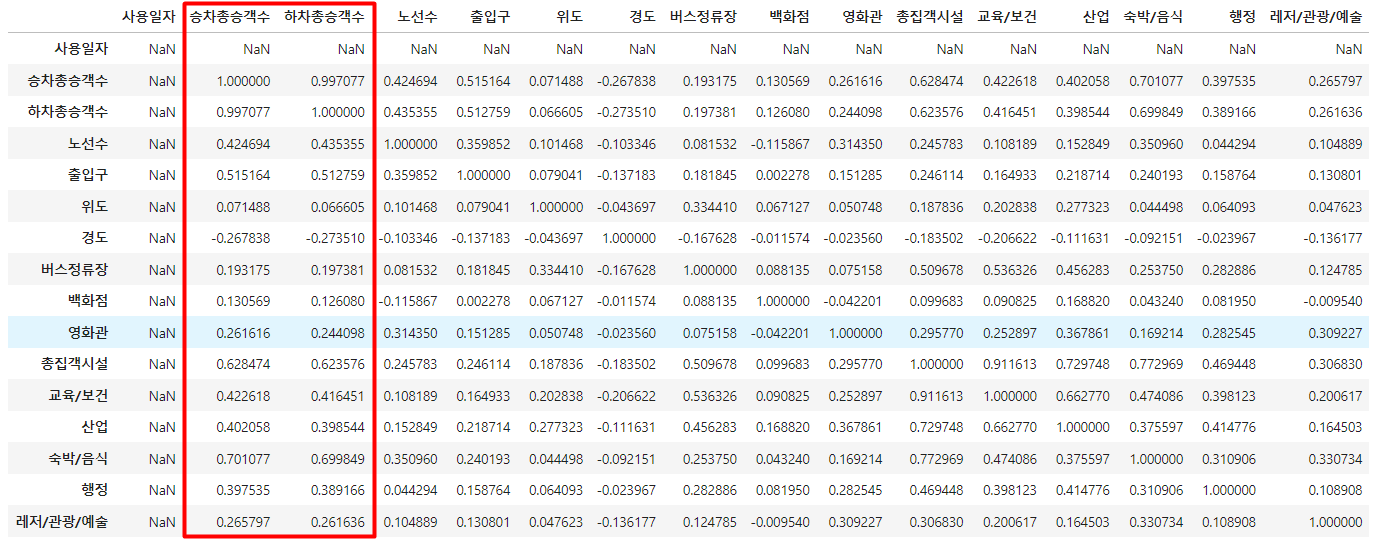